# LC2Music flute sonification synthesizer. Kepler Objects of Interest (KOI). Samples:1-100

Data download: https://archive.stsci.edu/pub/kepler/lightcurves/
#### ACKNOWLEDGMENT
This research includes data collected with the Kepler mission, obtained from the MAST data archive at the Space Telescope Science Institute (STScI). Funding for the Kepler mission is provided by the NASA Explorer Program and by the NASA Science Mission Directorate. STScI is operated by the Association of Universities for Research in Astronomy, Inc., under NASA contract NAS 5–26555.


In [1]:
import astropy
from astropy.timeseries import TimeSeries

from astropy import units as u
from astropy.timeseries import BoxLeastSquares
from astropy.stats import sigma_clipped_stats
from astropy.timeseries import aggregate_downsample

import matplotlib.pylab as plt
#%matplotlib inline
#%matplotlib notebook
import numpy as np

import os
from pathlib import Path

import random

import time
from pythonosc import udp_client


In [2]:
root = '## YOUR FOLDER PATH TO THE DOWNLOADED LIGHTCURVES ##'

In [ ]:
for path, subdirs, files in os.walk(root):
    for name in files:
        print([os.path.join(path, name)])

In [4]:
len(files)

801

In [5]:
file = [os.path.join(path, name)]
str = " " 
Ffile = (str.join(file))  

route = Path(Ffile)

Fname = route.with_suffix('')

In [6]:
sample = random.sample(files, 100)
sample

['kplr008866102-2009131105131_llc.fits',
 'kplr004164922-2009131105131_llc.fits',
 'kplr008240797-2009131105131_llc.fits',
 'kplr005716932-2009131105131_llc.fits',
 'kplr010480952-2009131105131_llc.fits',
 'kplr010464199-2009131105131_llc.fits',
 'kplr009217583-2009131105131_llc.fits',
 'kplr012356746-2009131105131_llc.fits',
 'kplr010917433-2009131105131_llc.fits',
 'kplr010879899-2009131105131_llc.fits',
 'kplr012401863-2009131105131_llc.fits',
 'kplr009166700-2009131105131_llc.fits',
 'kplr009110610-2009131105131_llc.fits',
 'kplr010264660-2009131105131_llc.fits',
 'kplr002305866-2009131105131_llc.fits',
 'kplr008076215-2009131105131_llc.fits',
 'kplr011807274-2009131105131_llc.fits',
 'kplr012300524-2009131105131_llc.fits',
 'kplr005946568-2009131105131_llc.fits',
 'kplr003561464-2009131105131_llc.fits',
 'kplr005860347-2009131105131_llc.fits',
 'kplr002307415-2009131105131_llc.fits',
 'kplr011760860-2009131105131_llc.fits',
 'kplr010735331-2009131105131_llc.fits',
 'kplr011817750-

/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Use

/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/var

/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Use

/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var

/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(3, 1, figsize=(8, 12))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color

/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var

/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Use

/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slic

/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slic

/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var

/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/var

/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/var

/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/var

/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var

/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Use

/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/as

/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Use

/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/var

/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' ke

/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Use

/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Use

/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_5701/4011471782.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:31: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i] : indices[i + 1]]))
/Users/adrian/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:32: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1] :]))


KOI represented: 100 curves


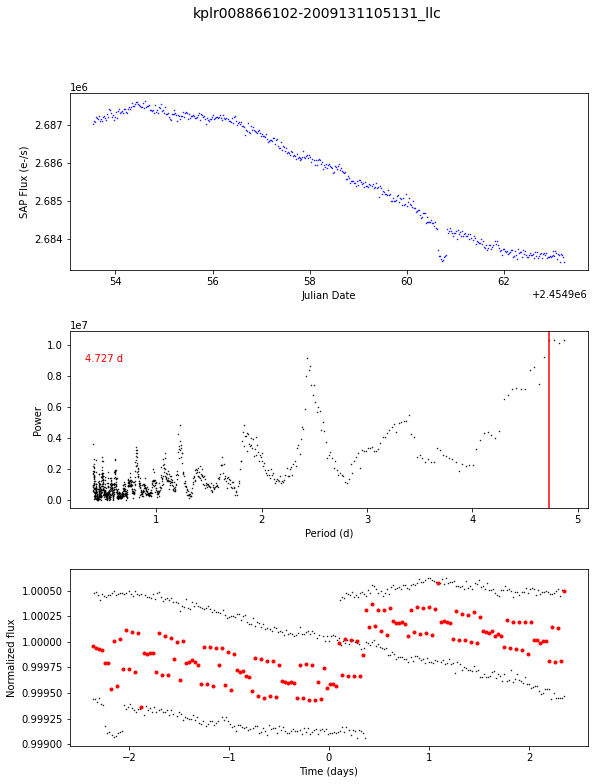

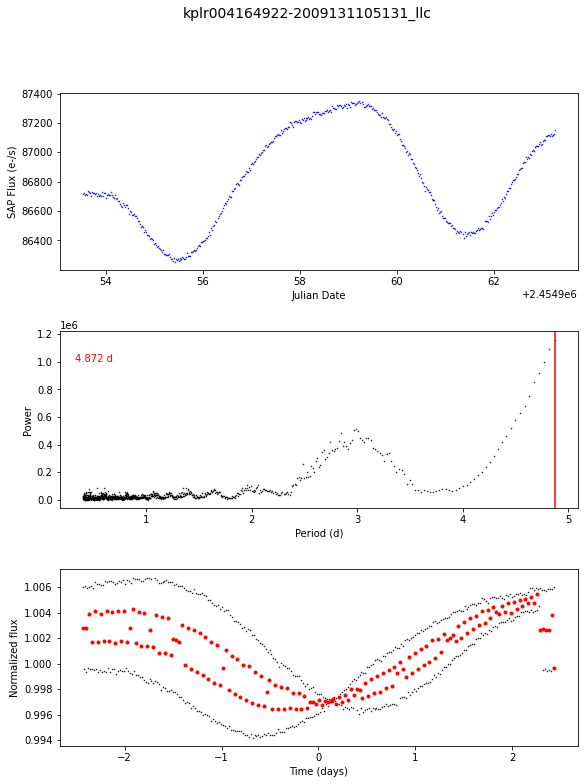

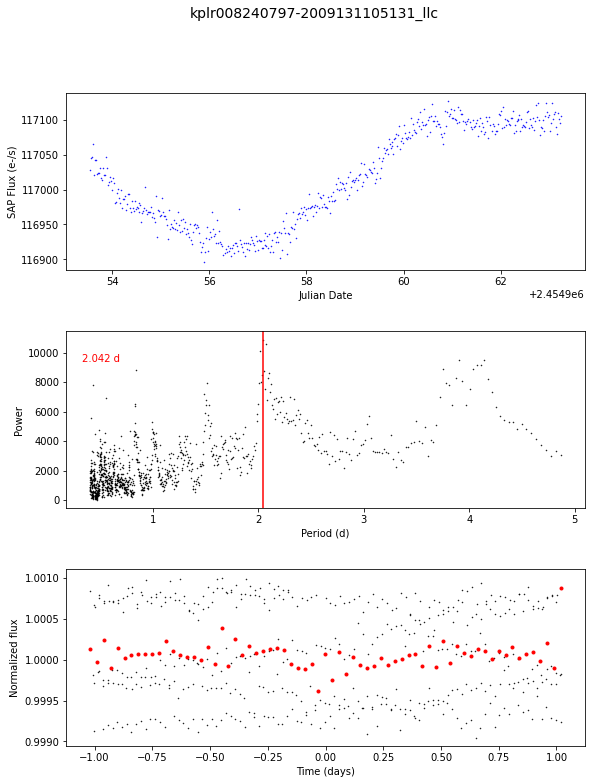

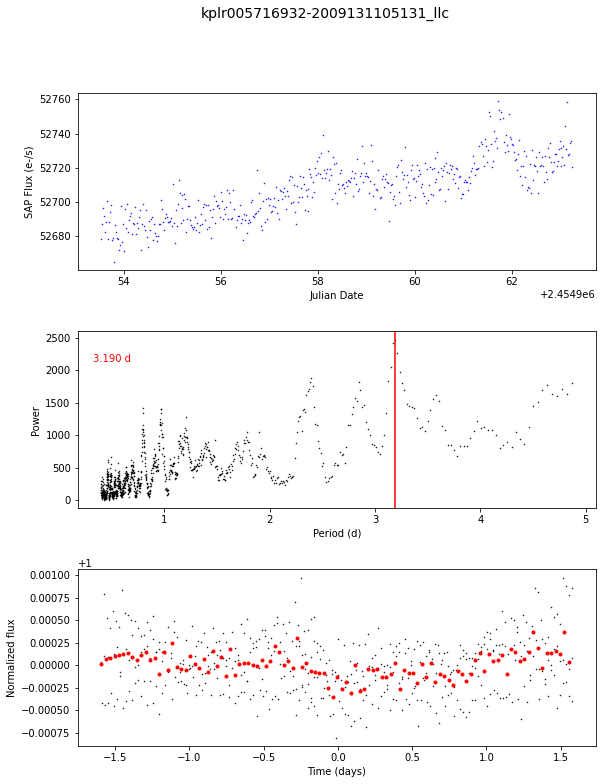

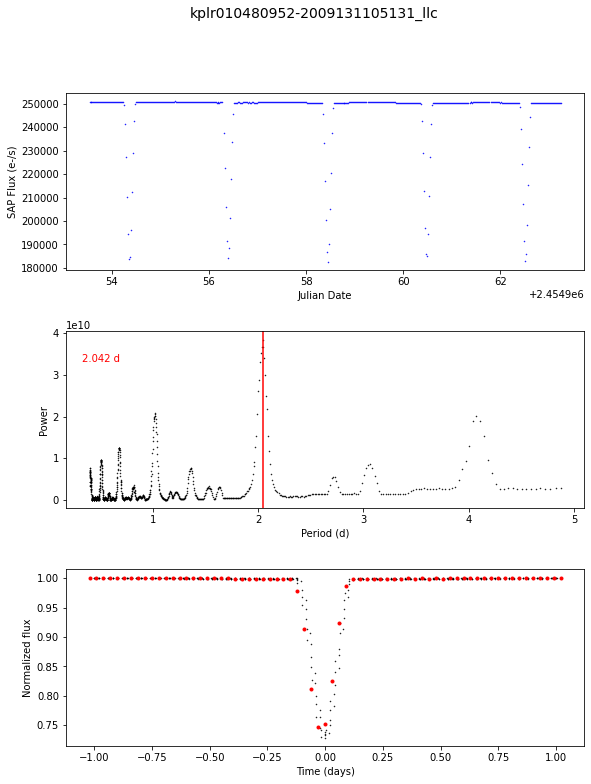

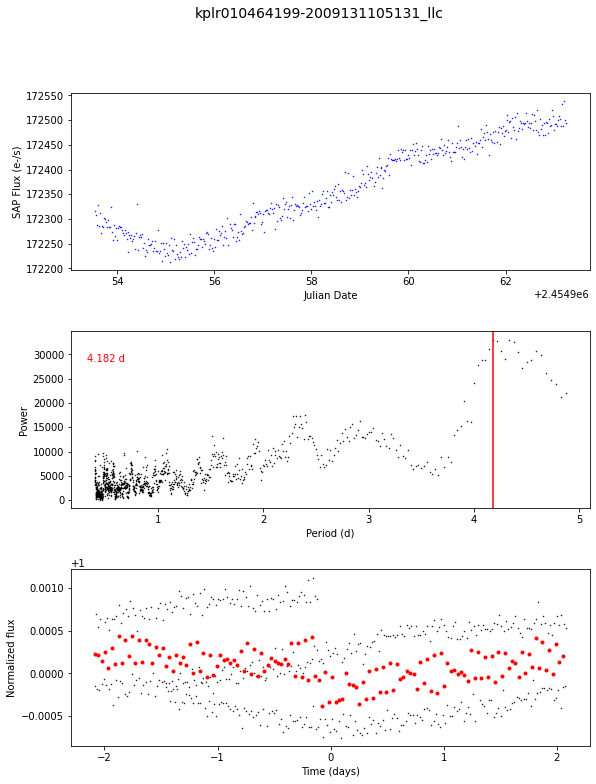

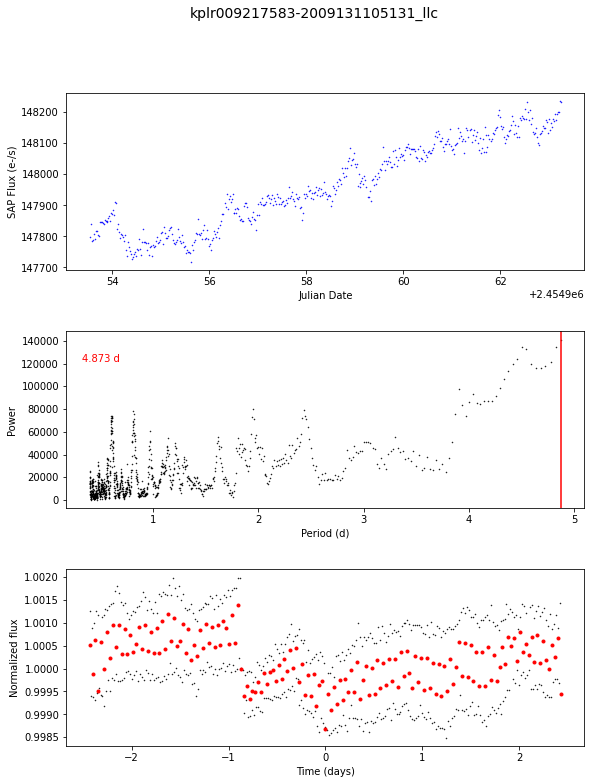

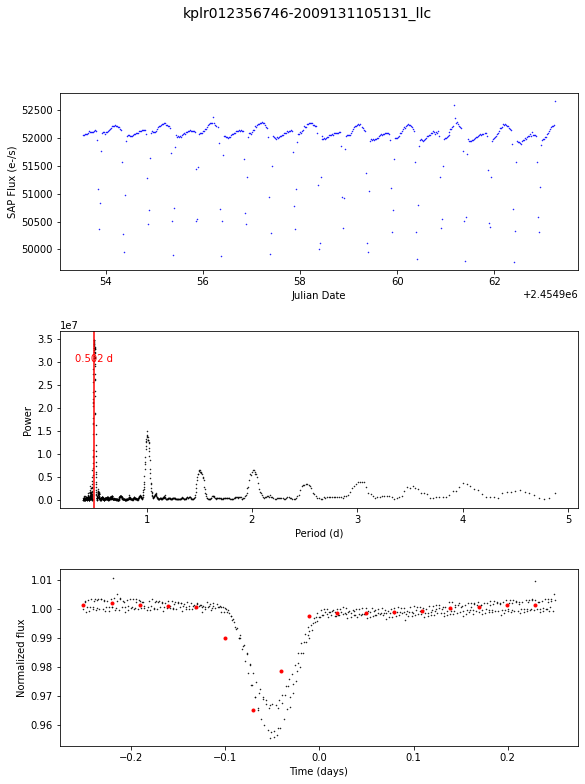

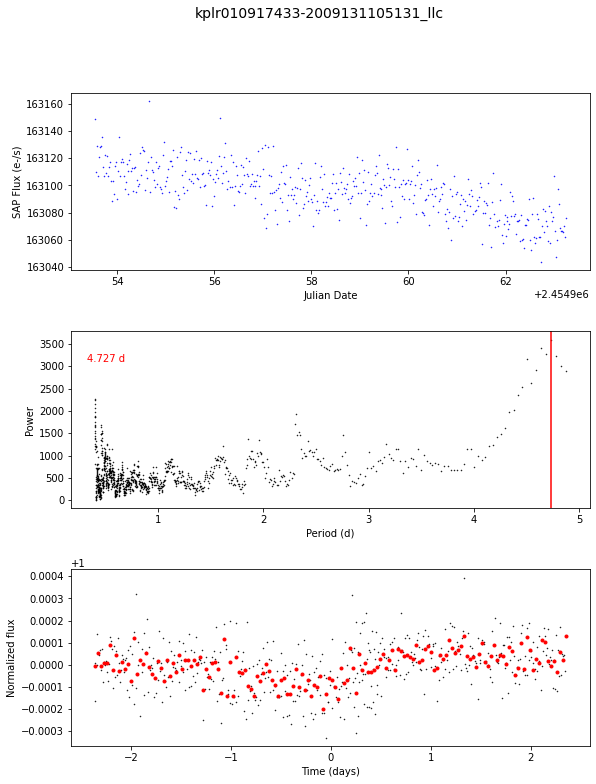

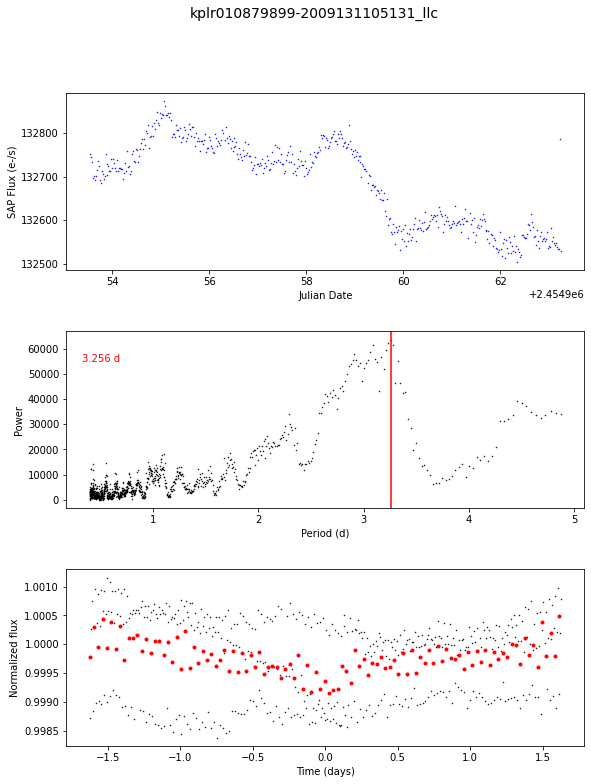

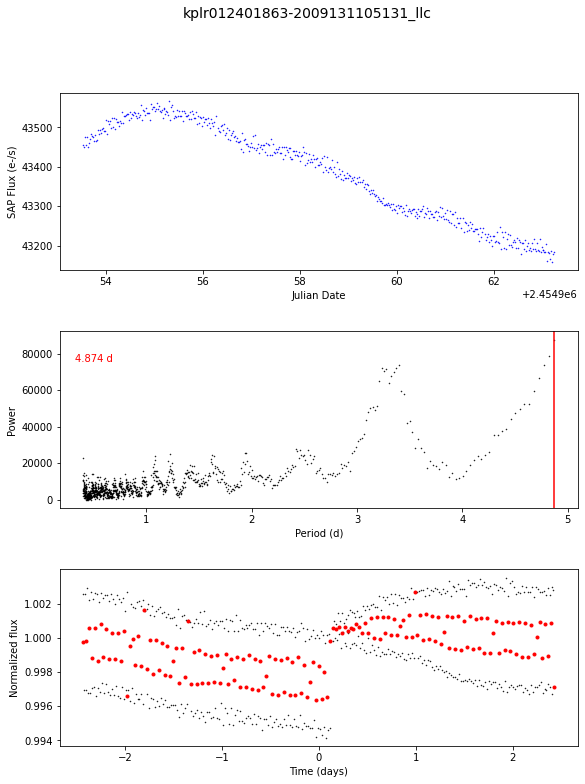

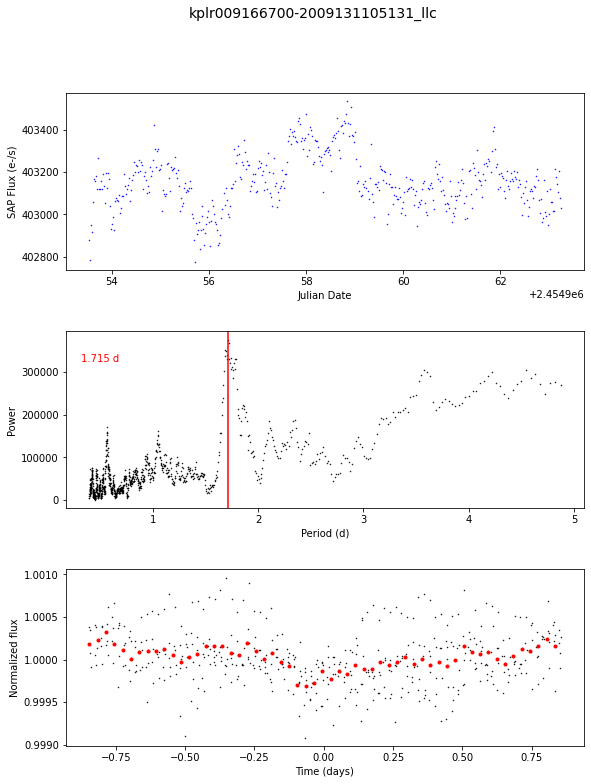

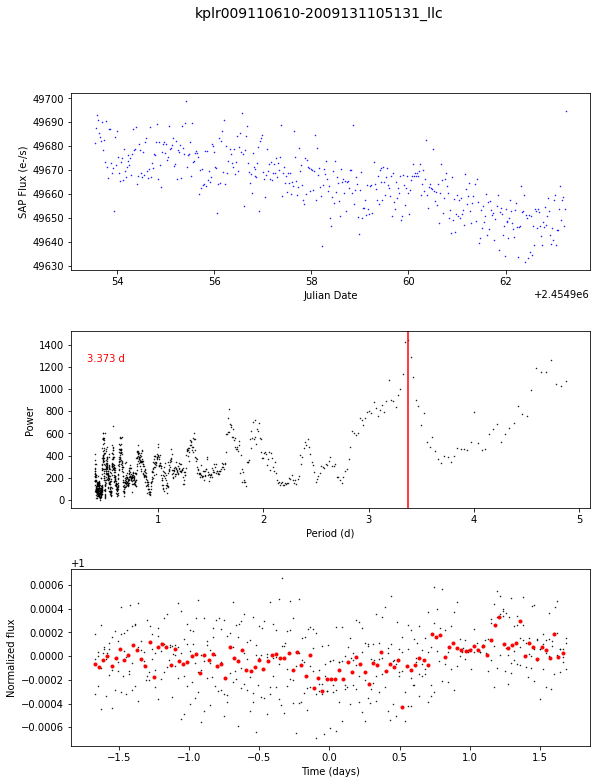

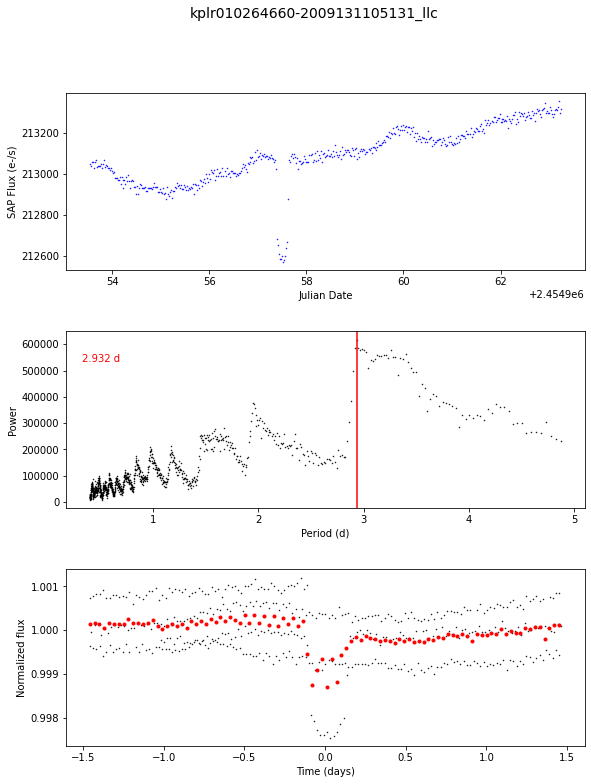

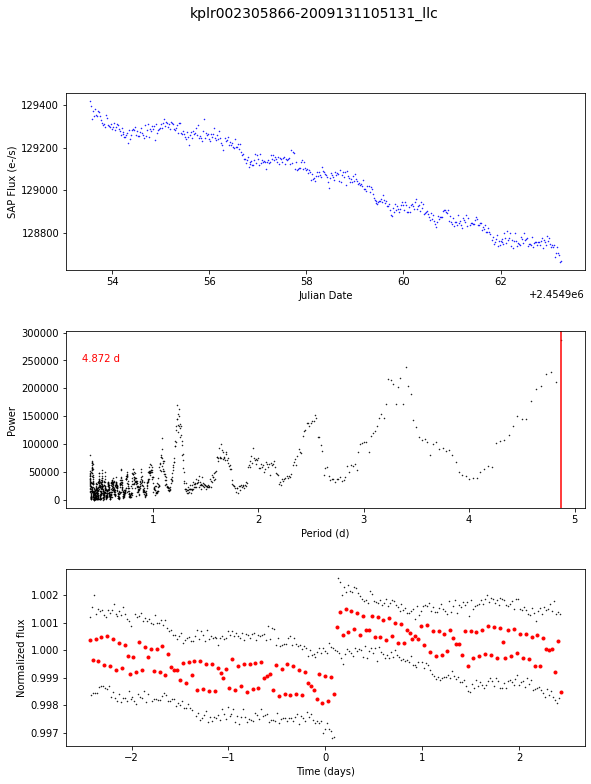

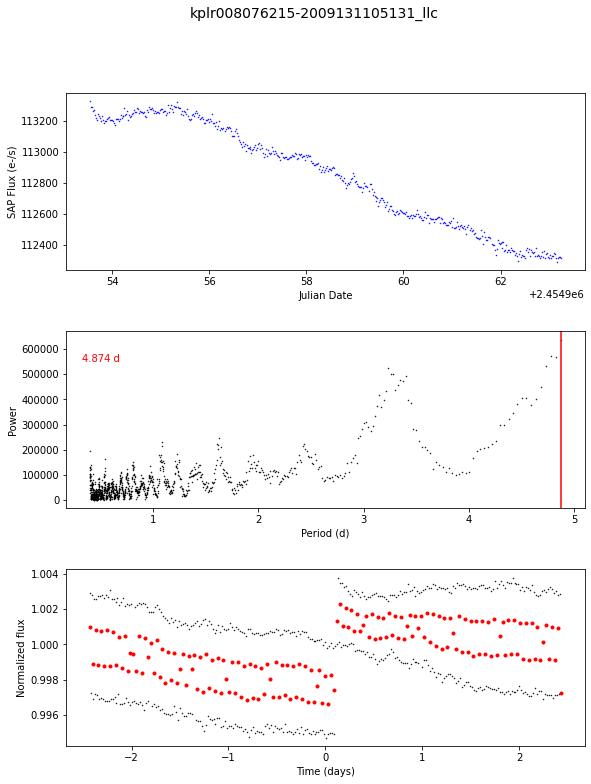

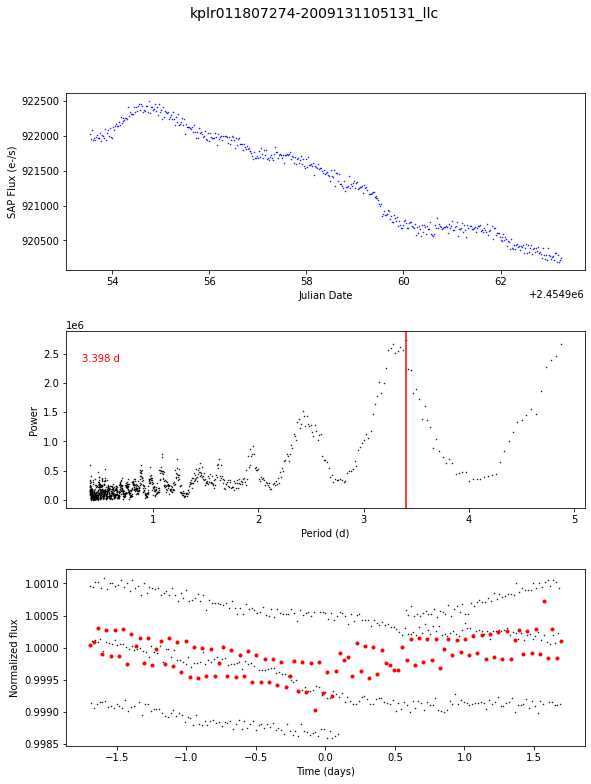

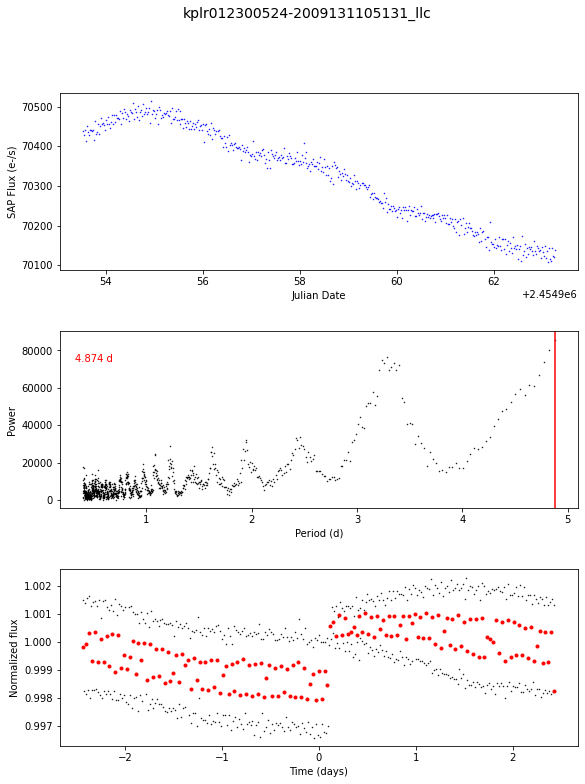

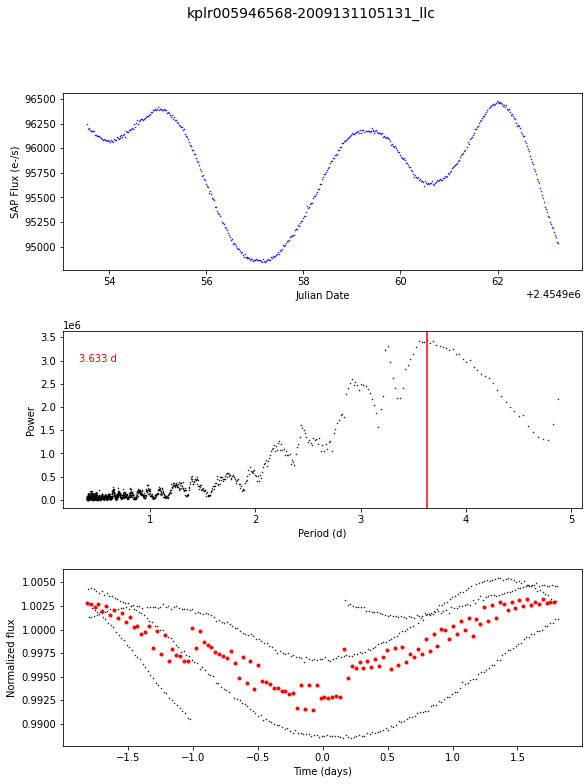

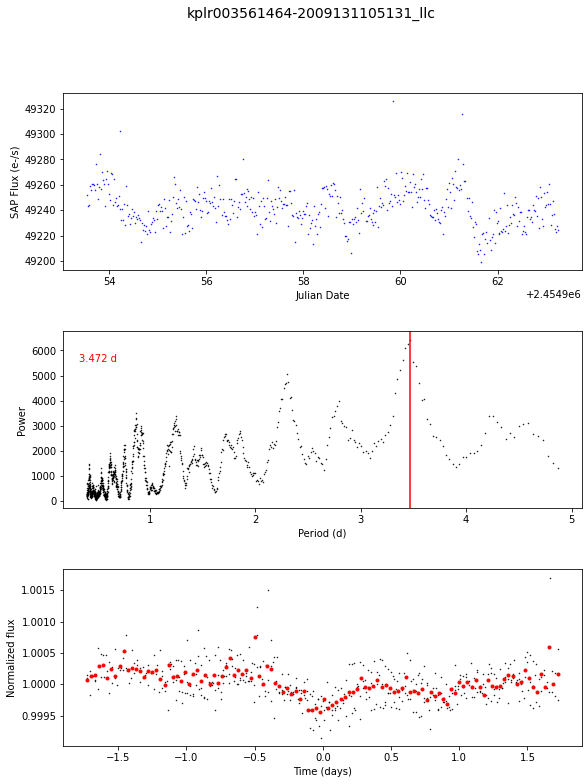

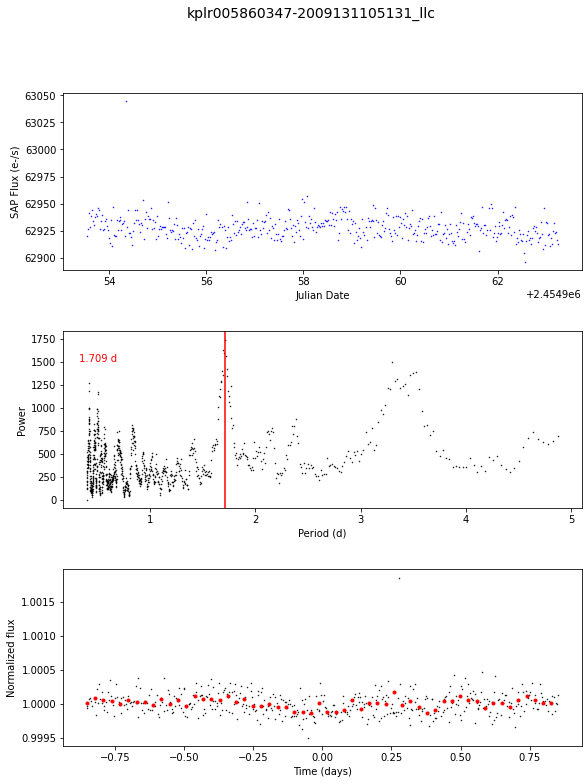

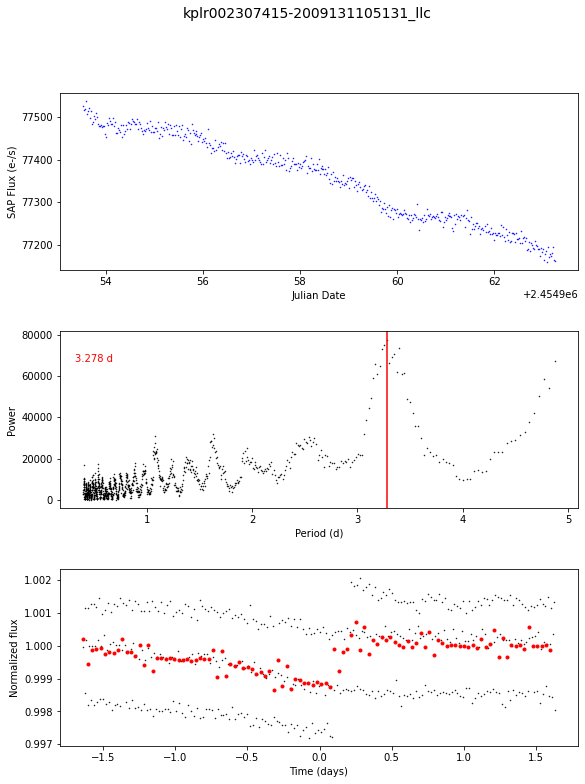

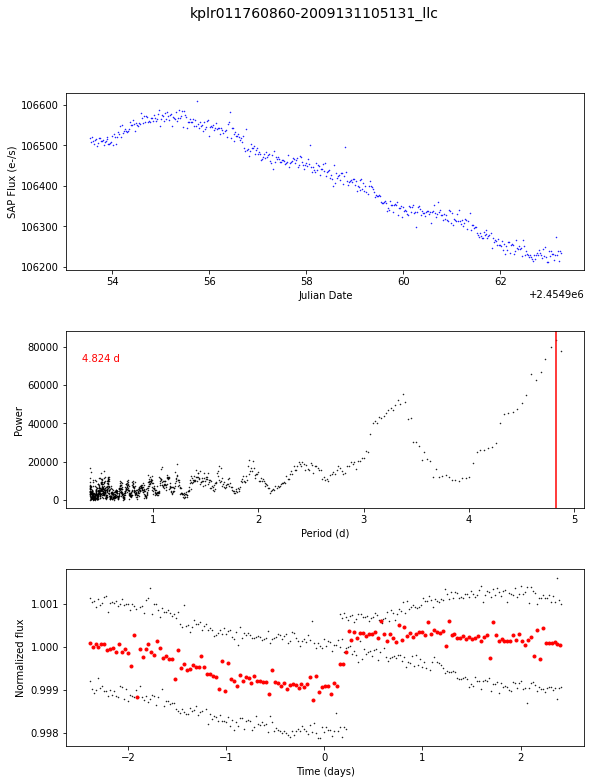

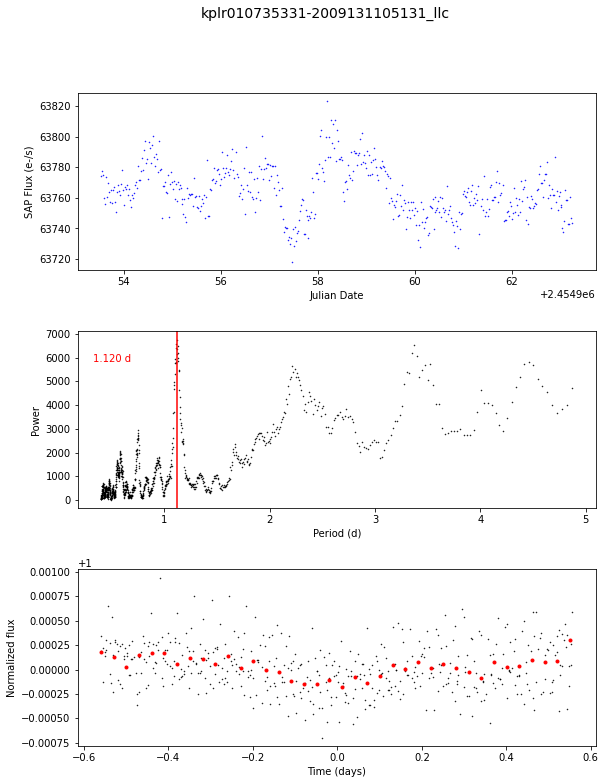

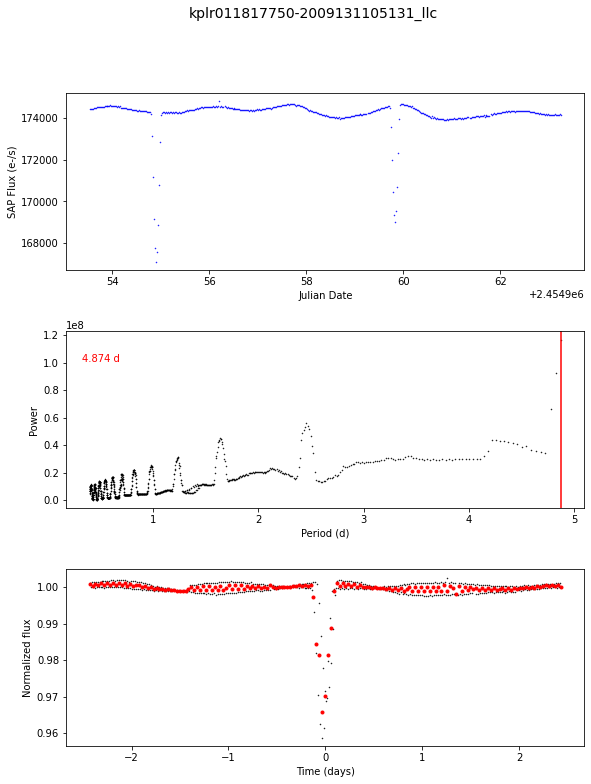

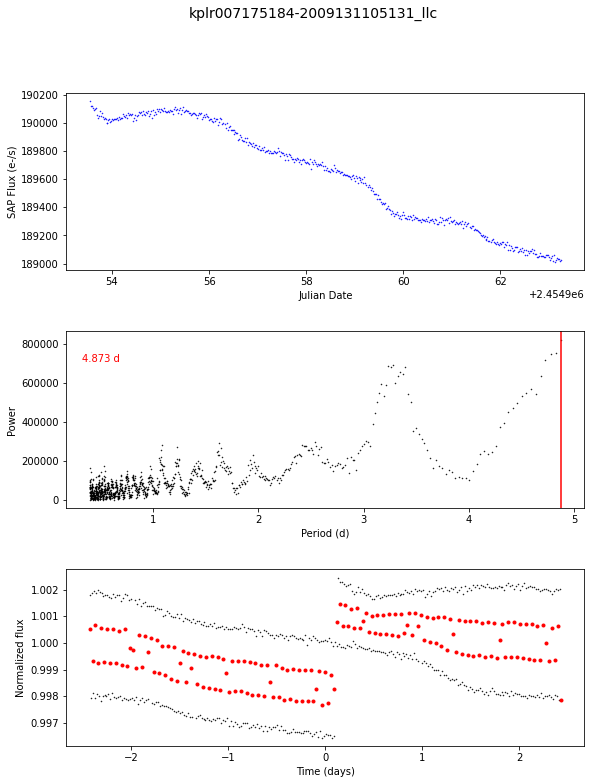

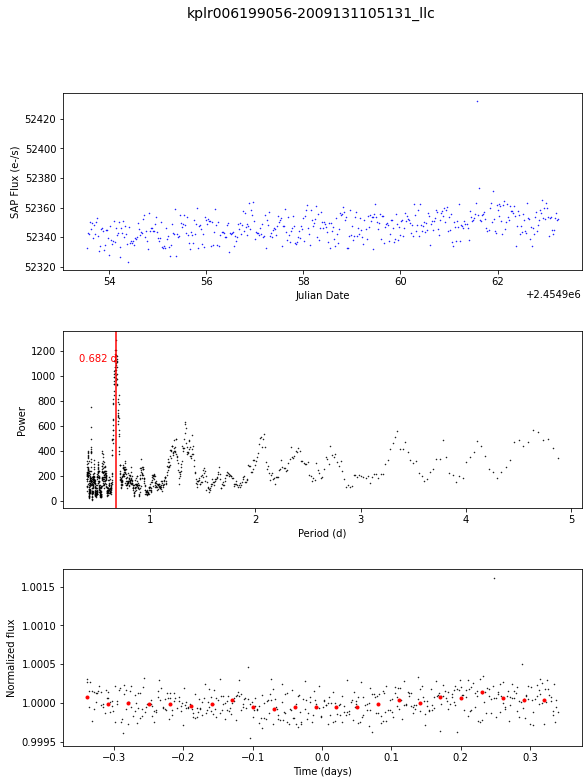

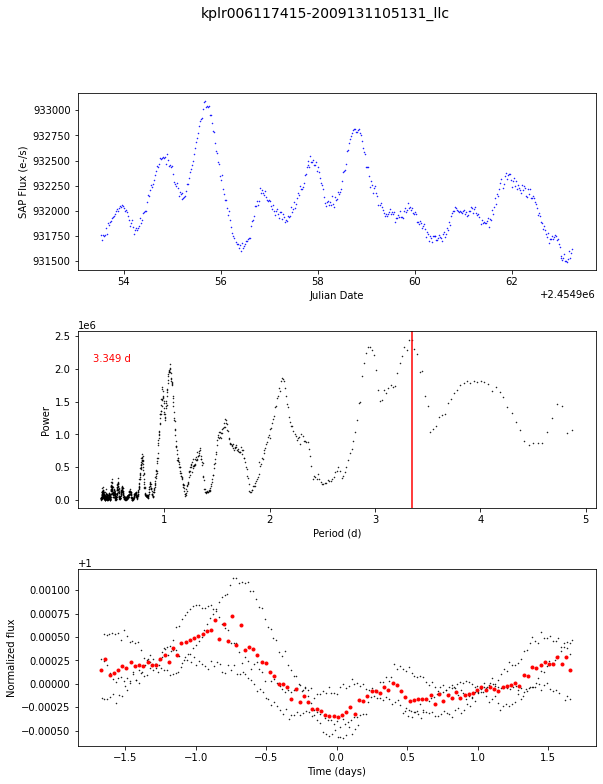

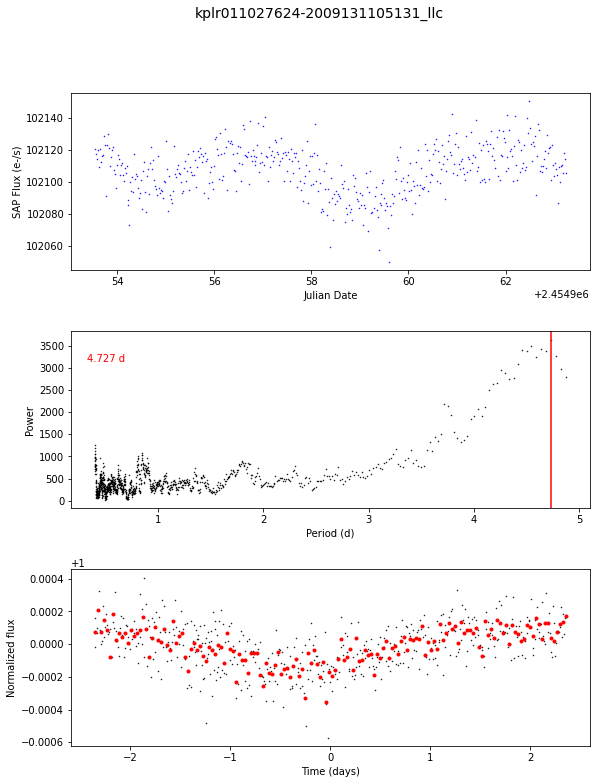

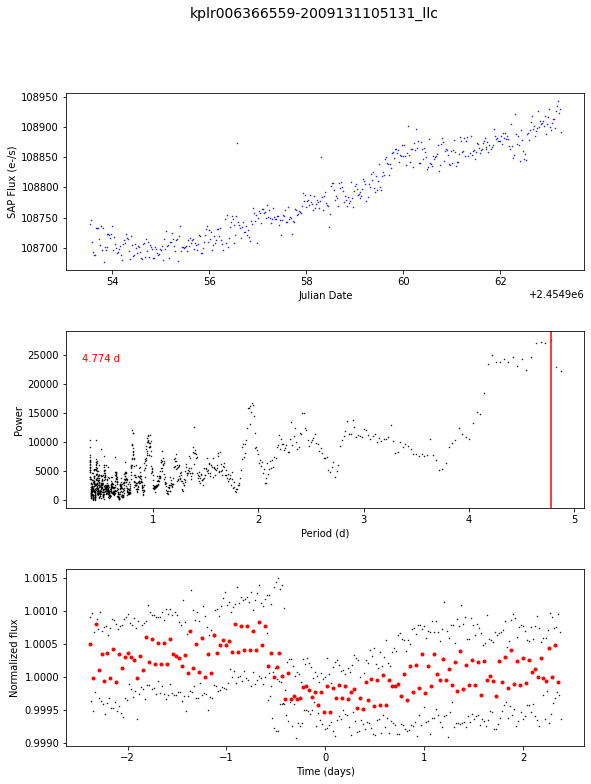

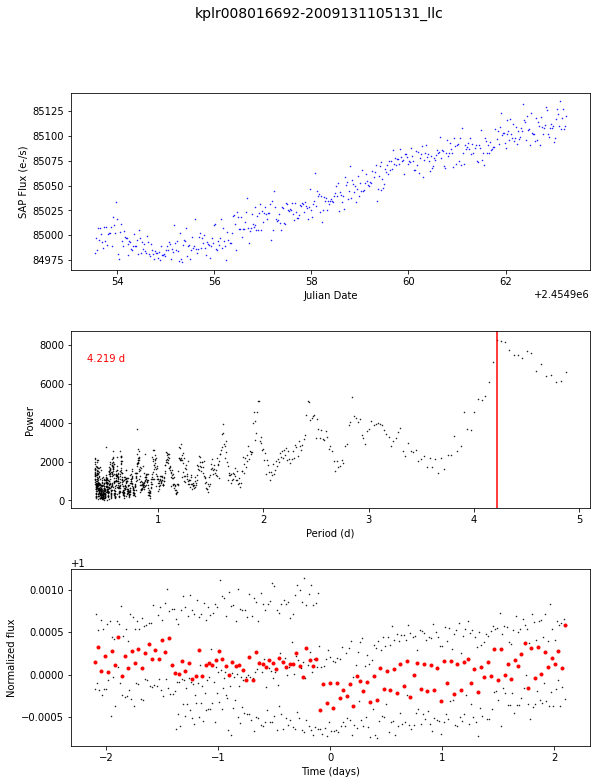

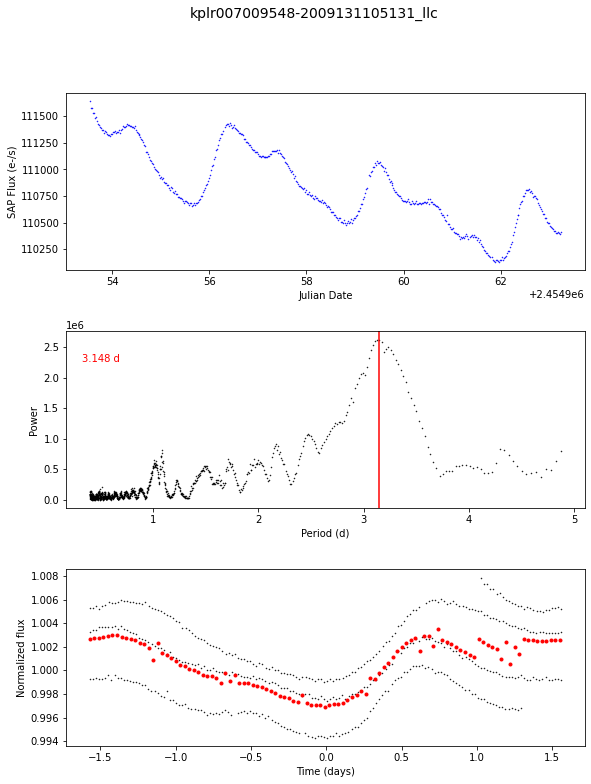

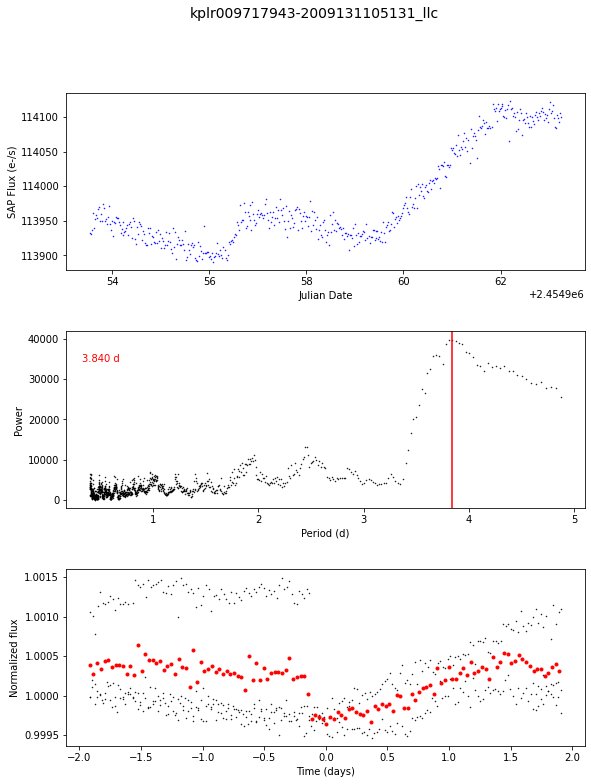

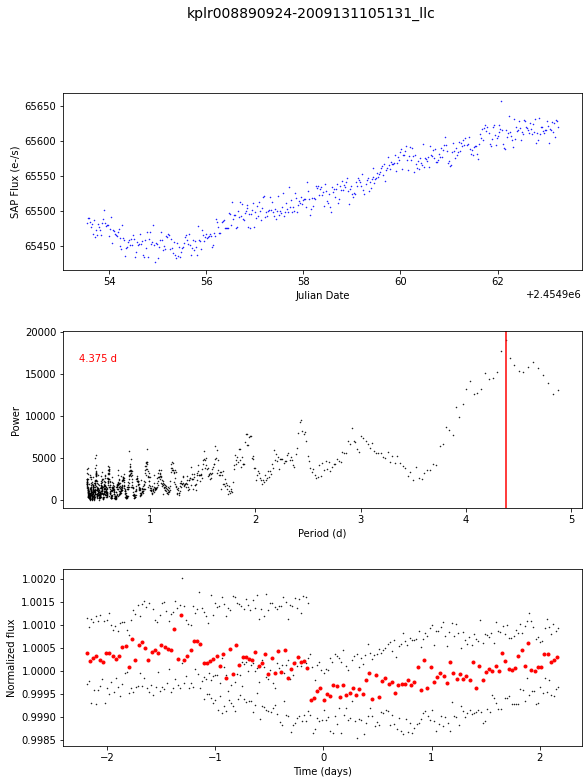

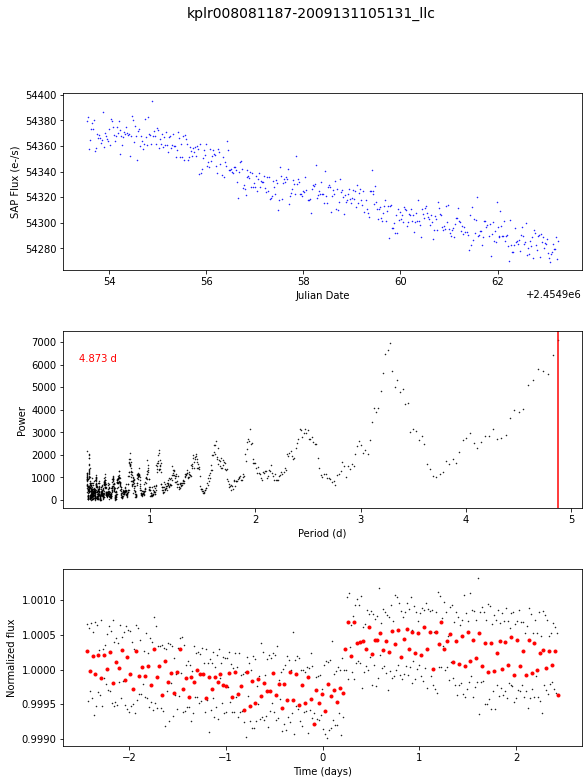

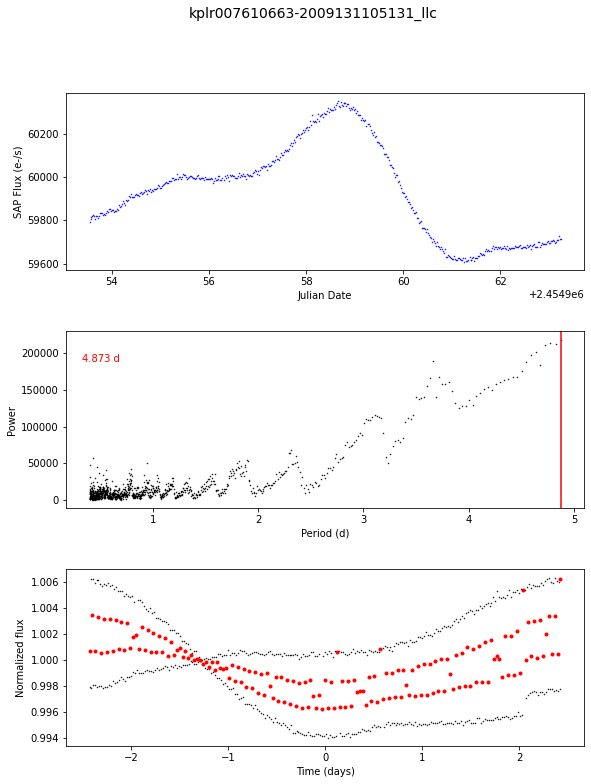

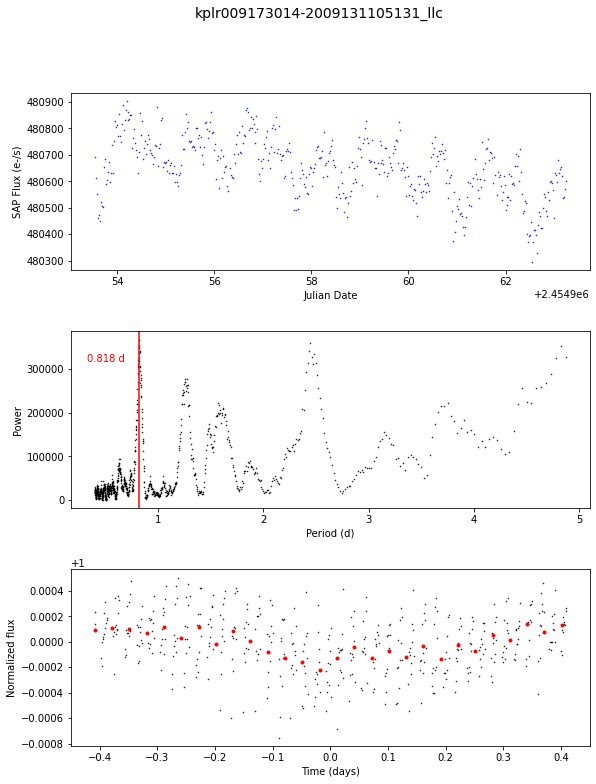

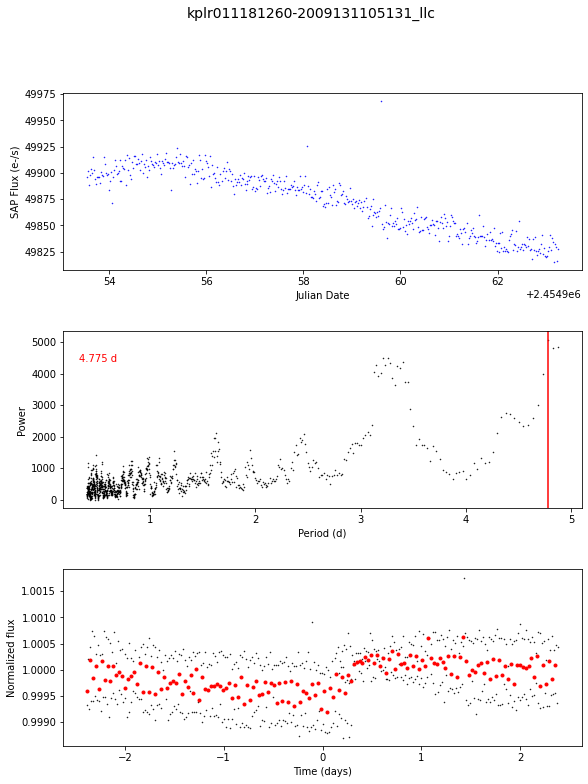

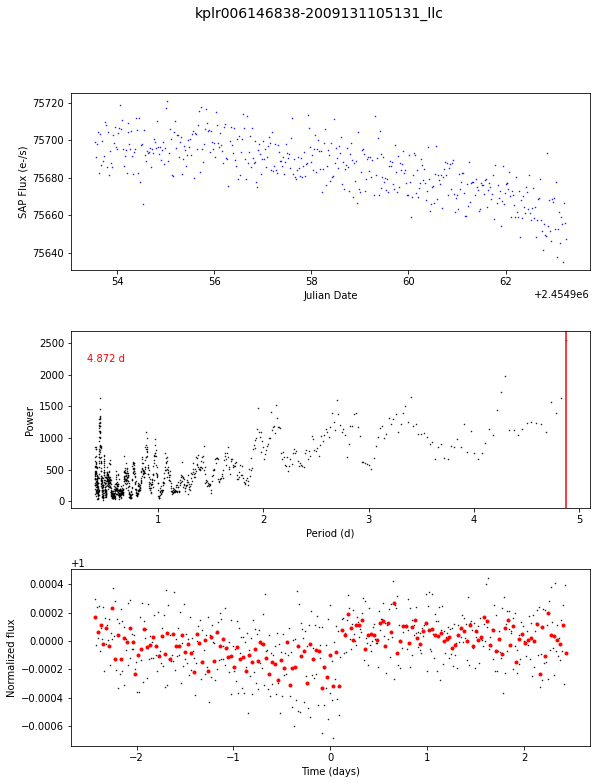

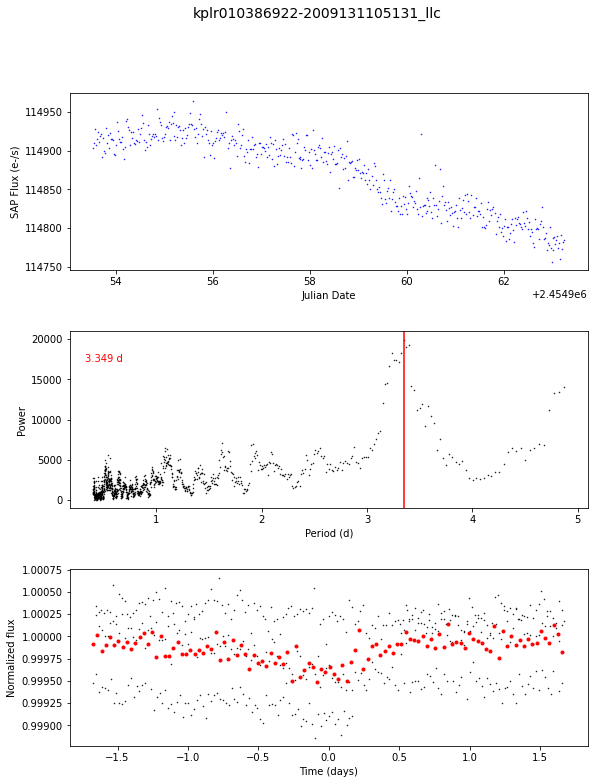

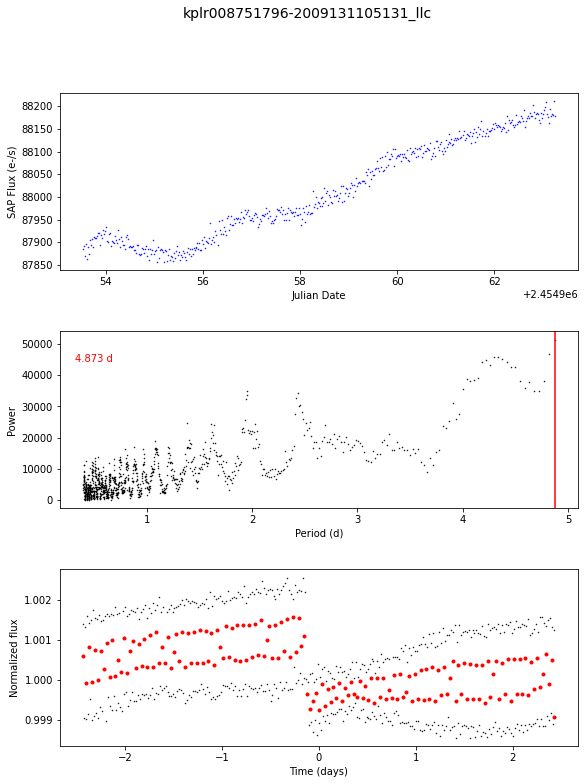

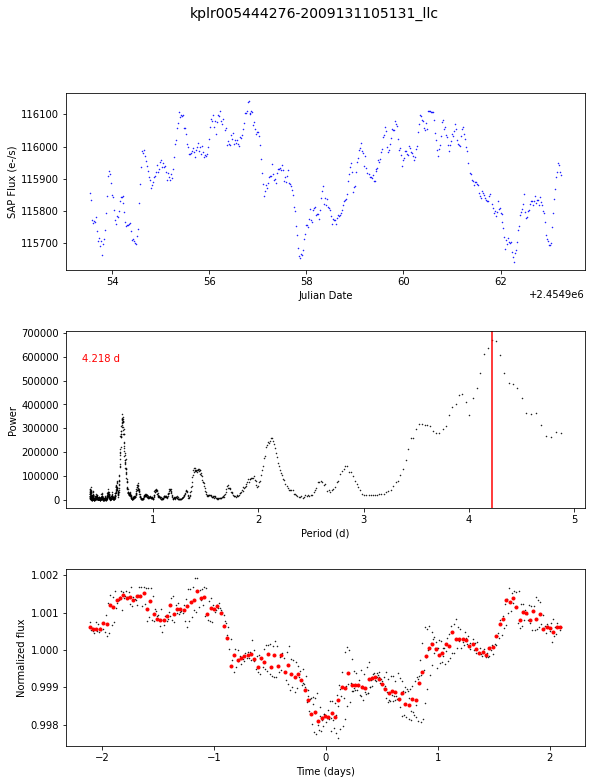

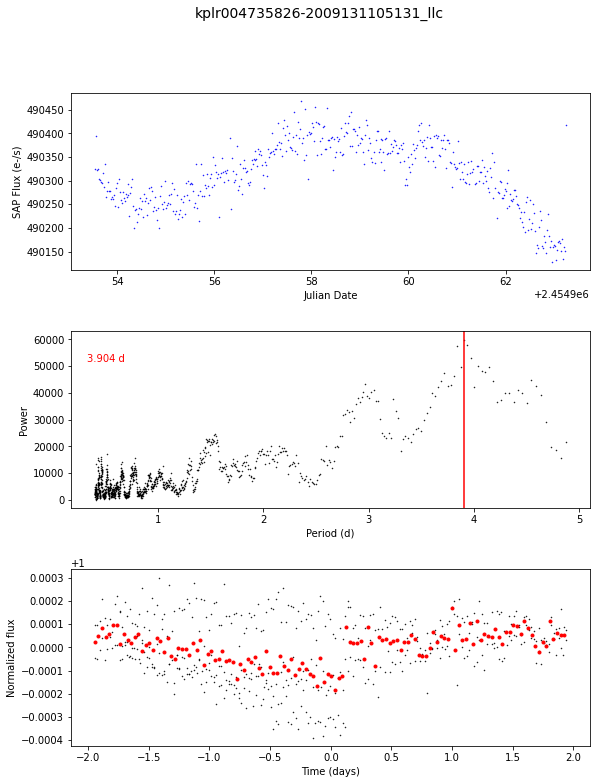

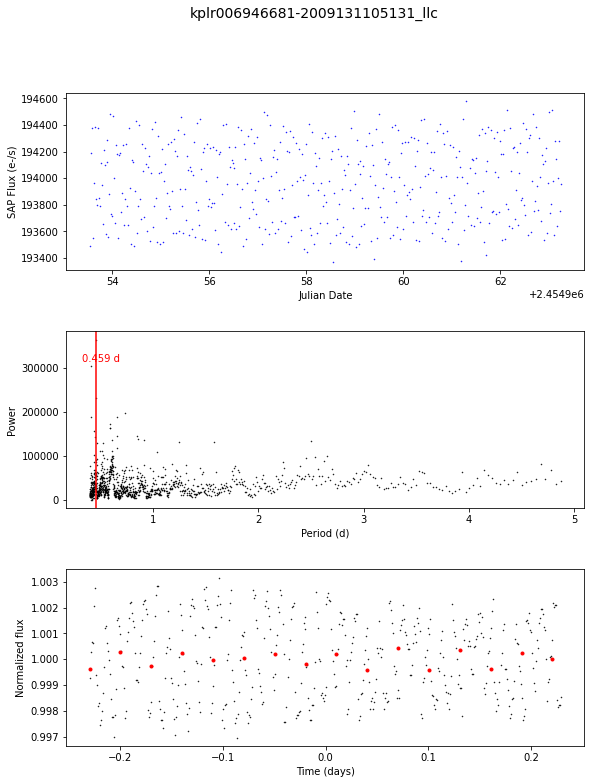

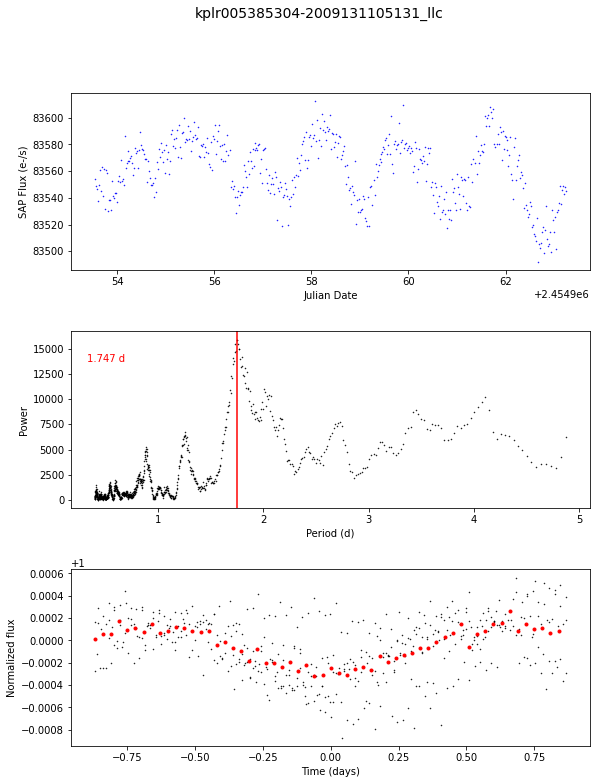

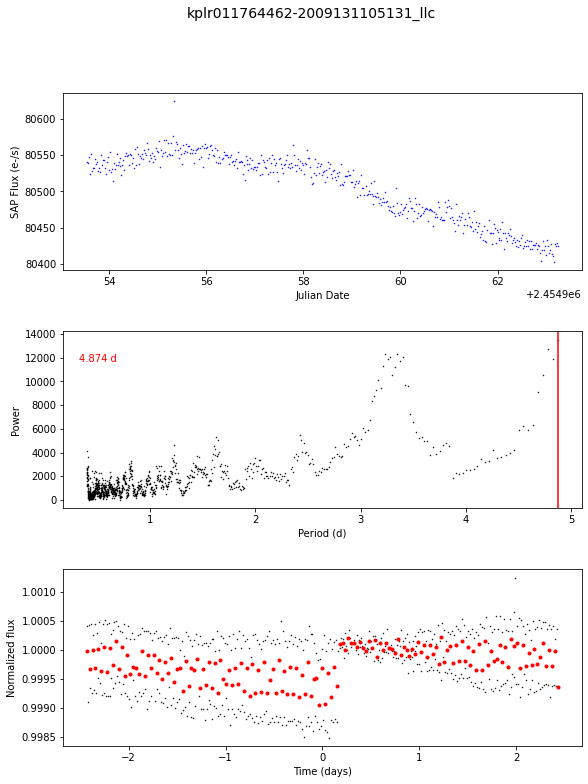

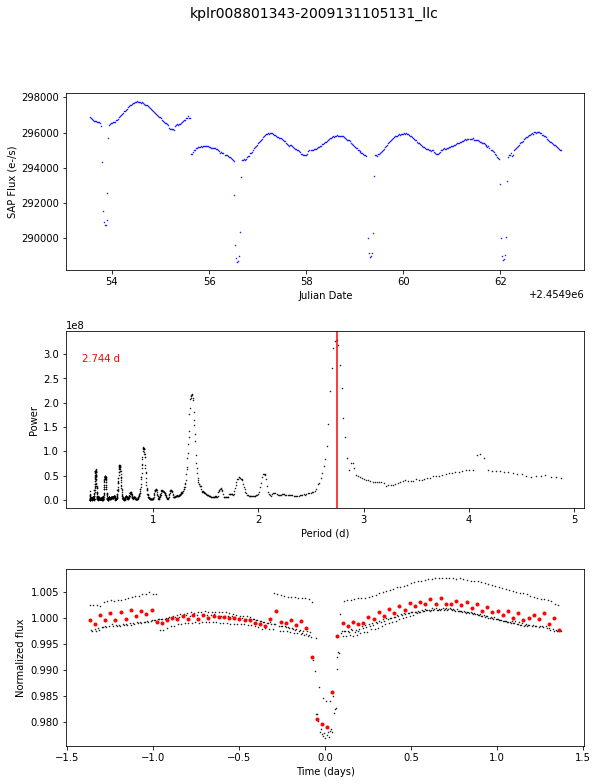

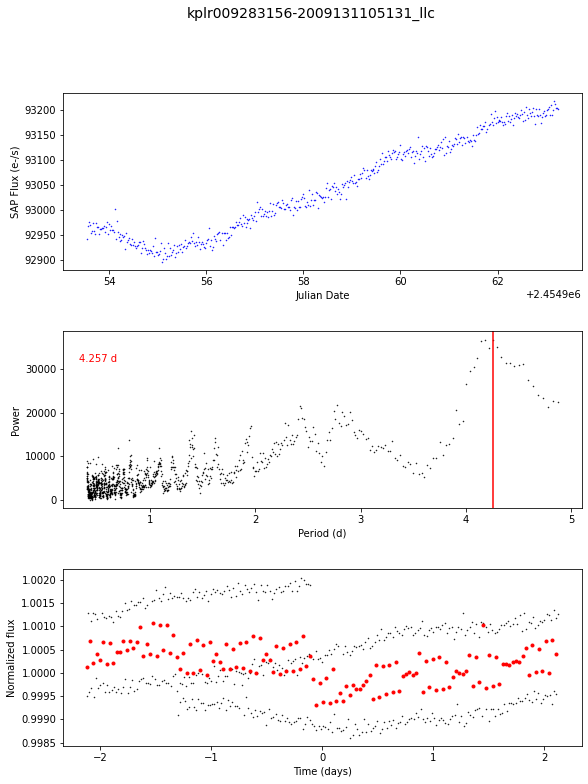

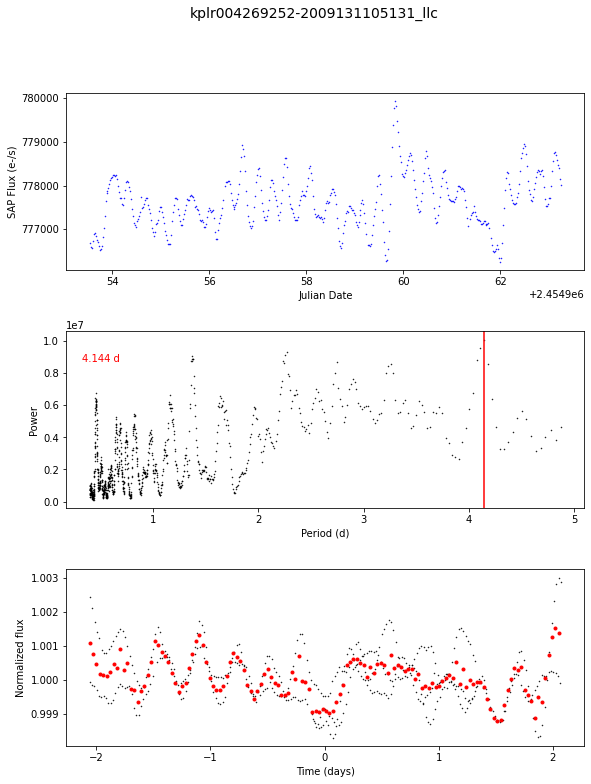

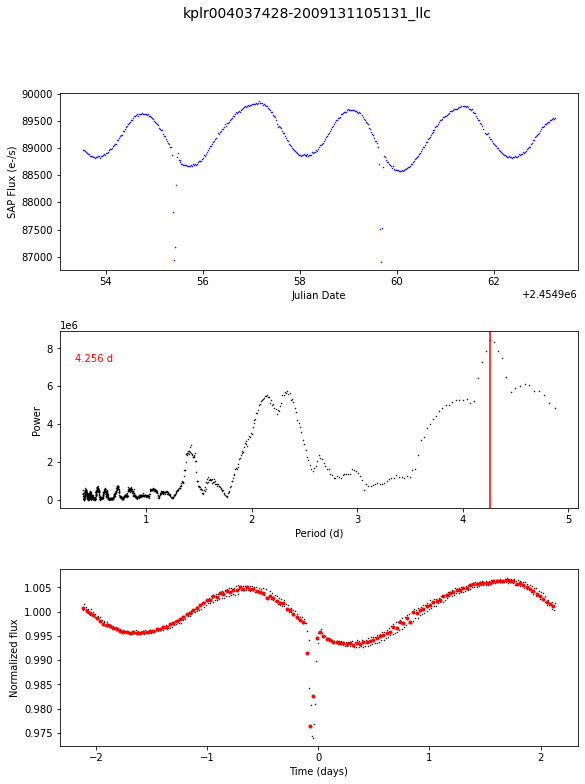

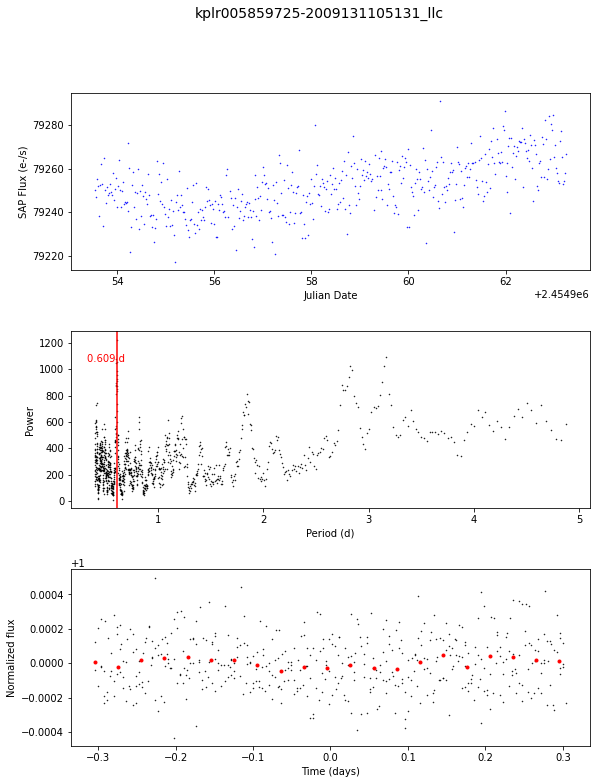

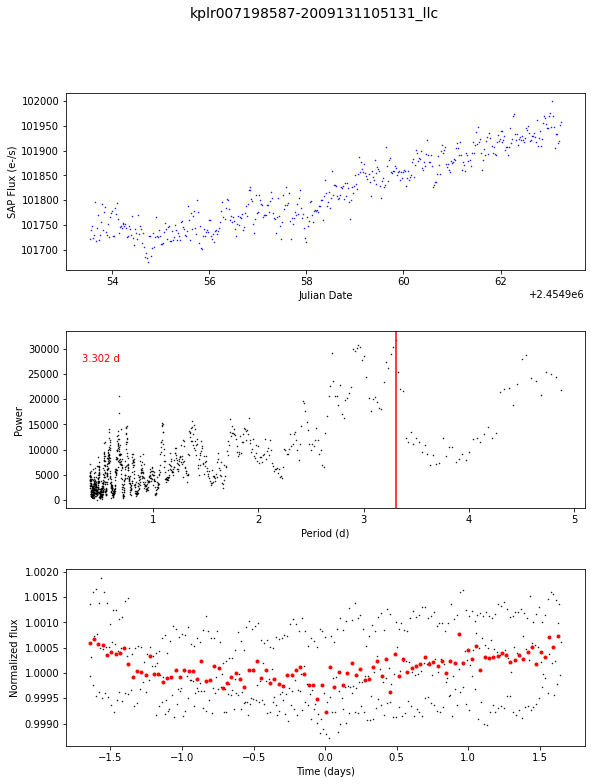

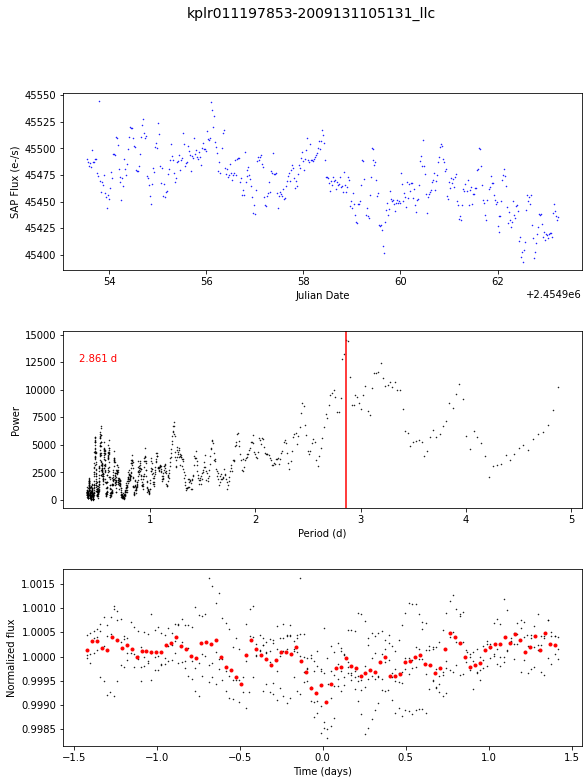

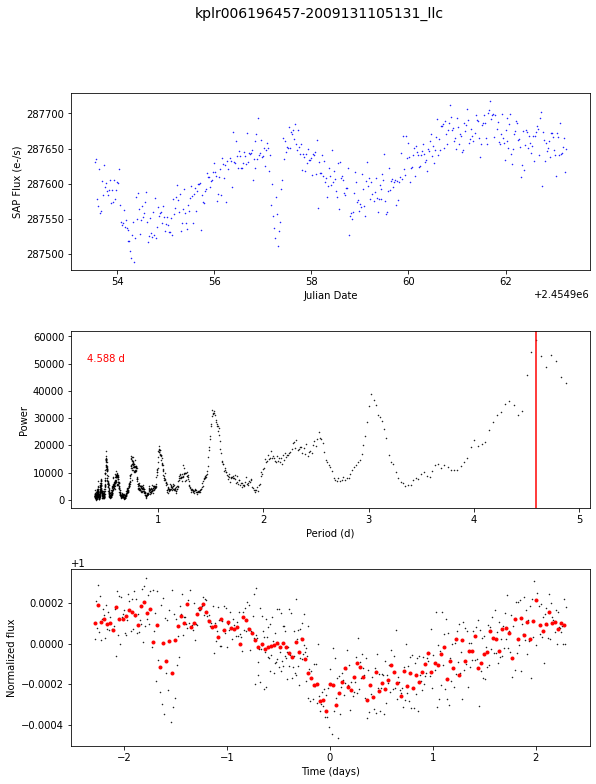

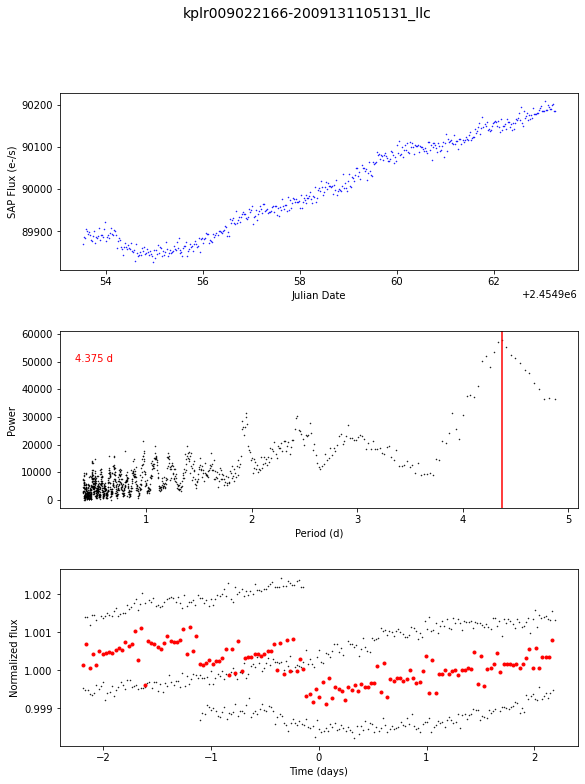

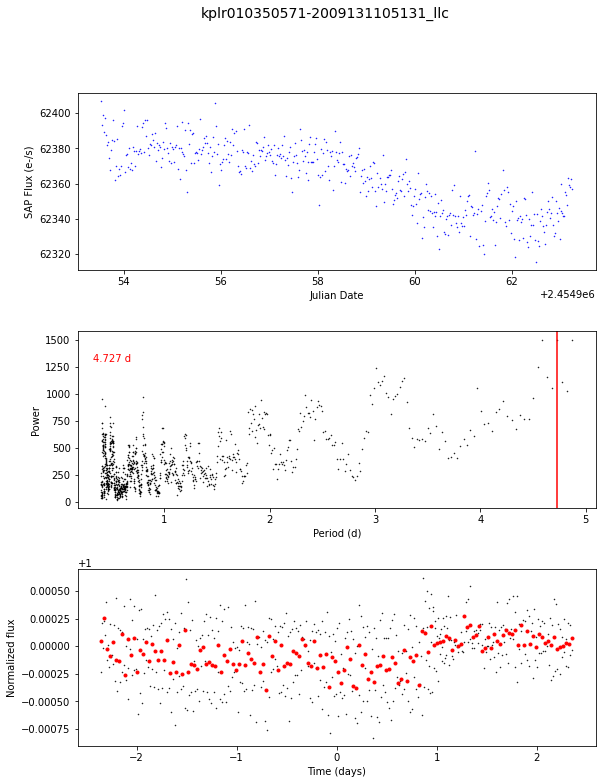

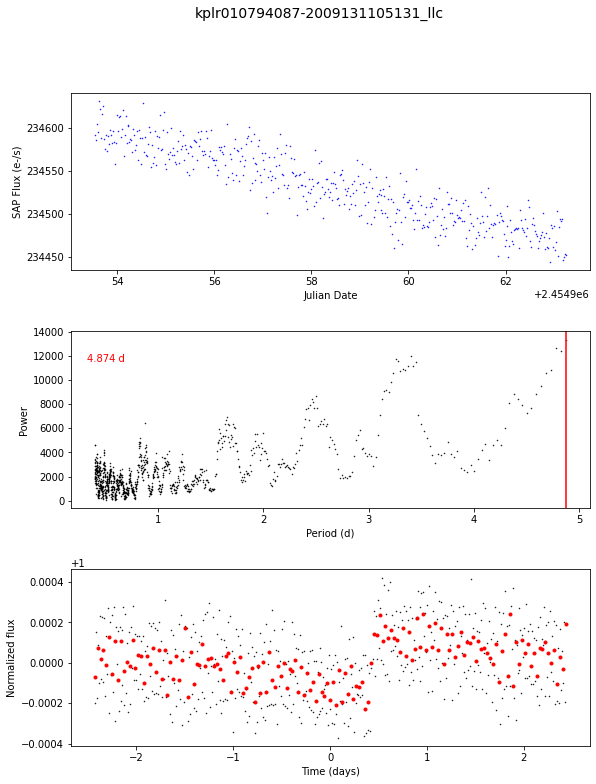

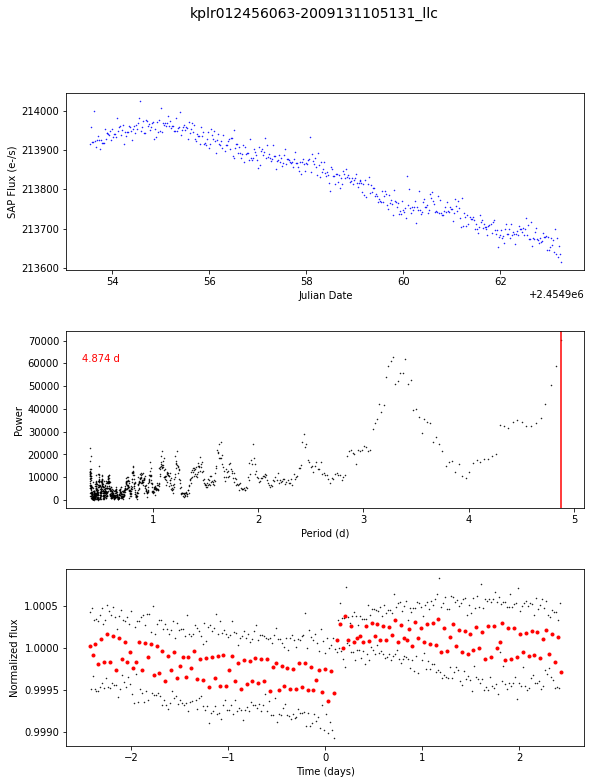

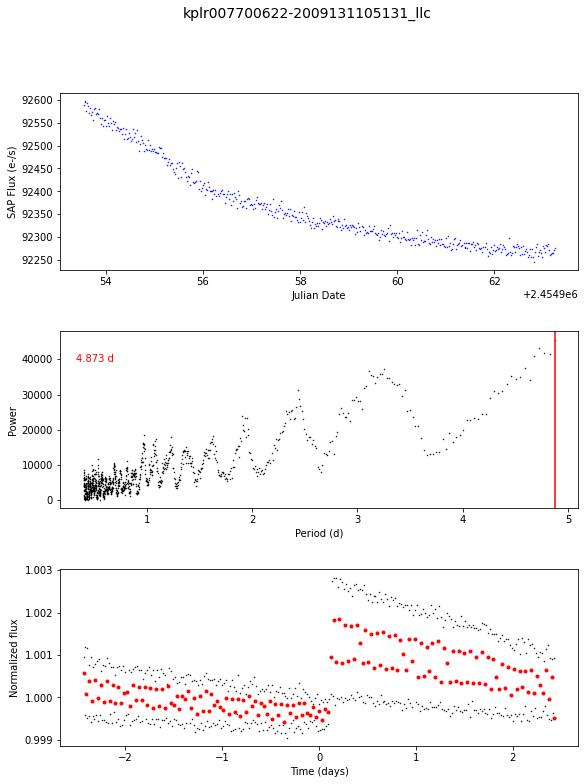

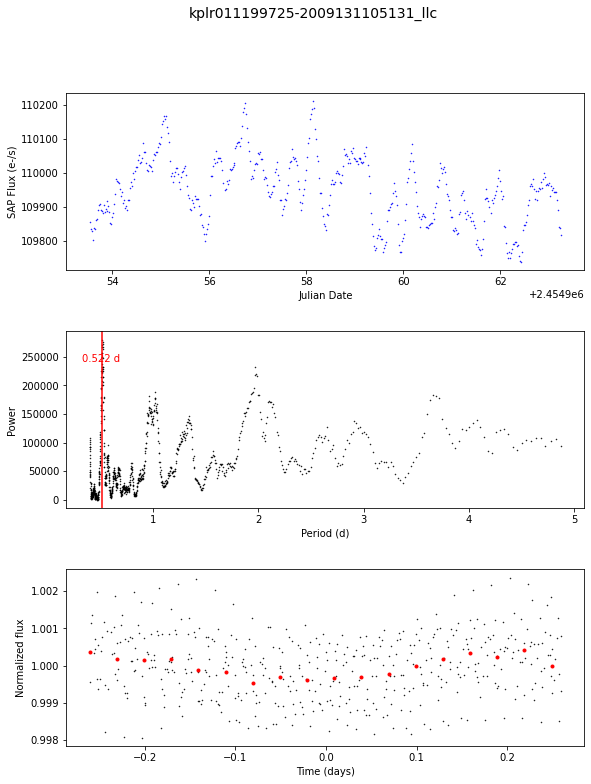

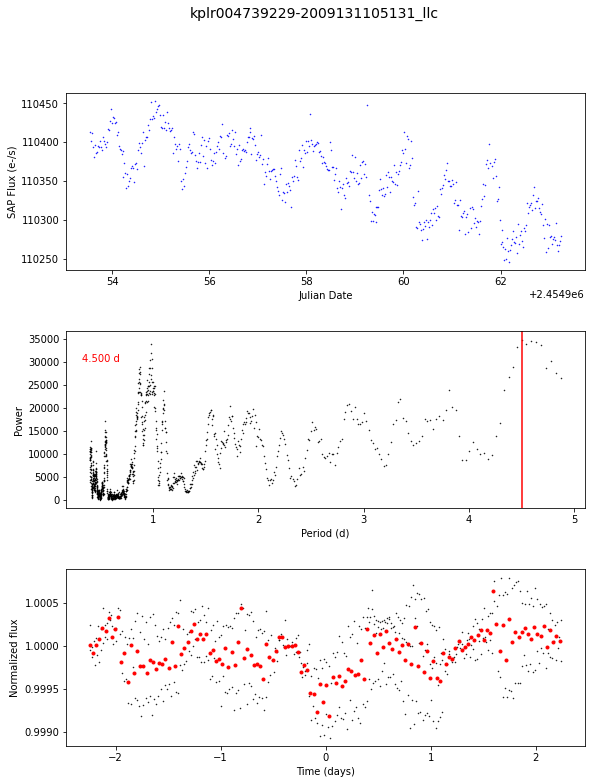

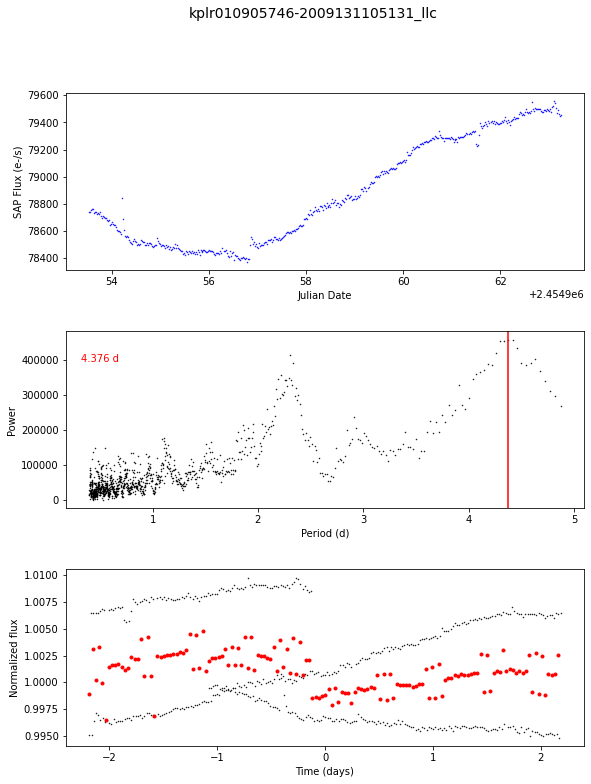

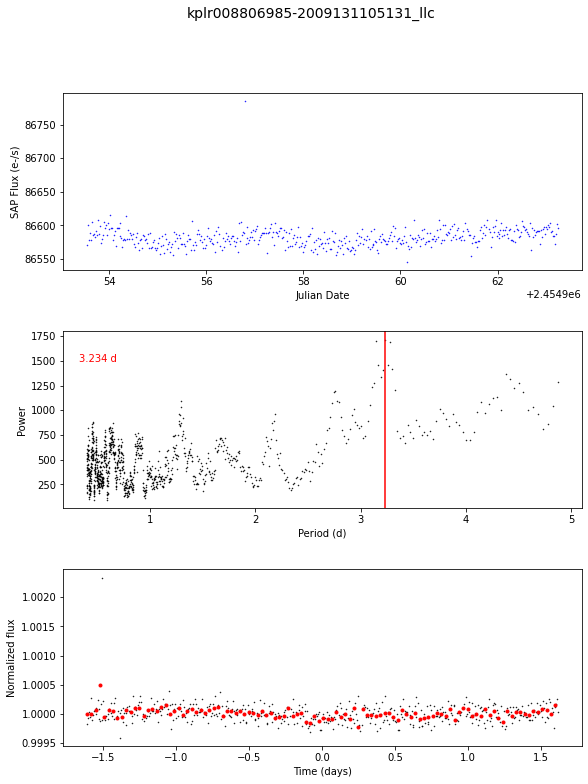

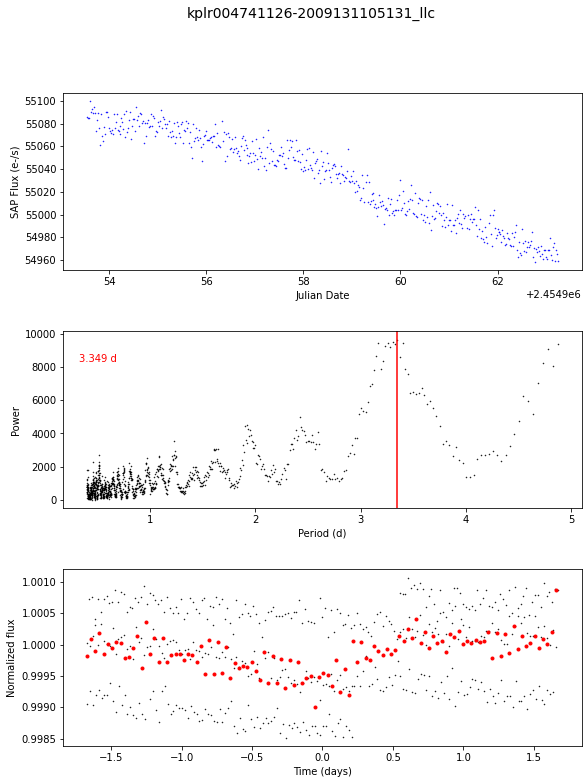

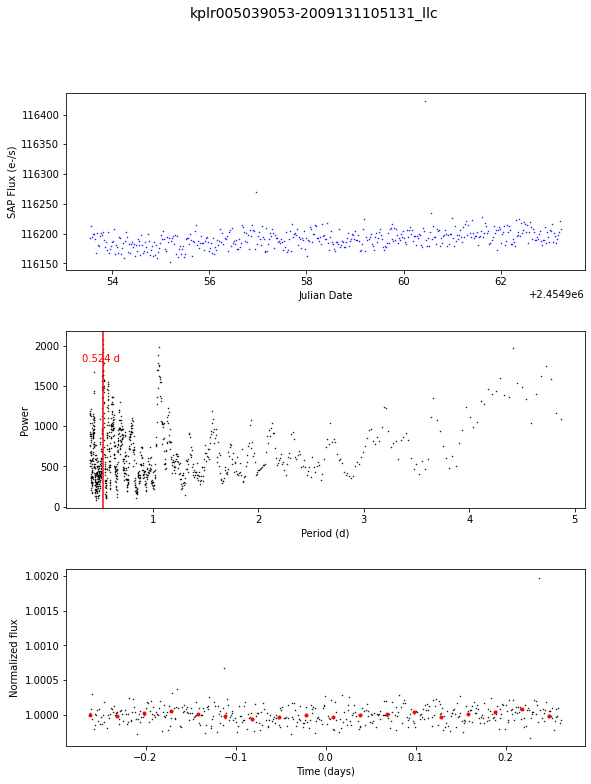

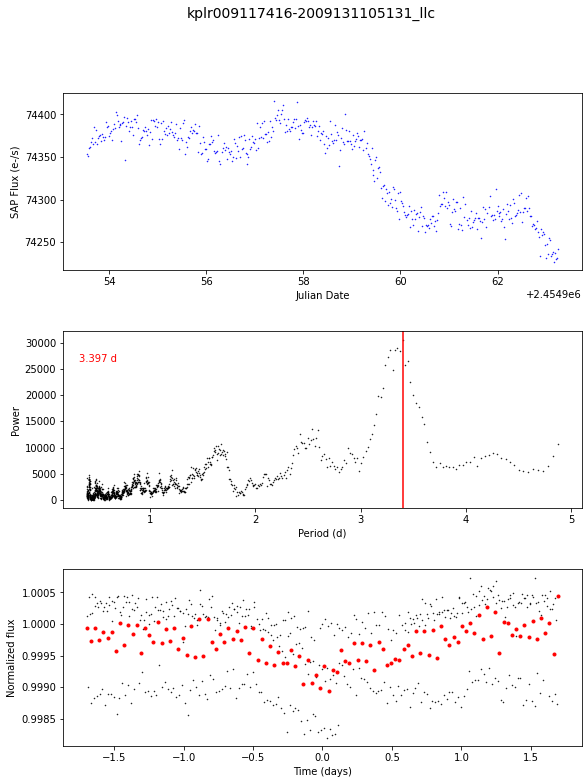

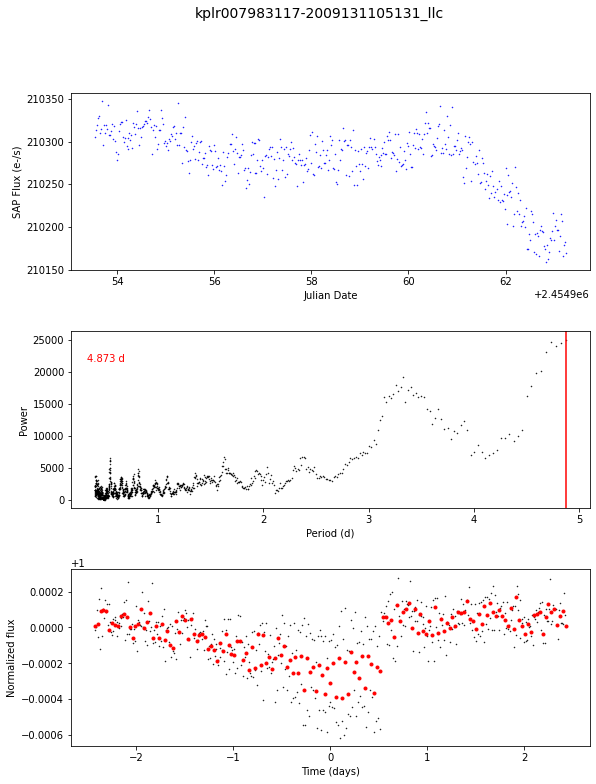

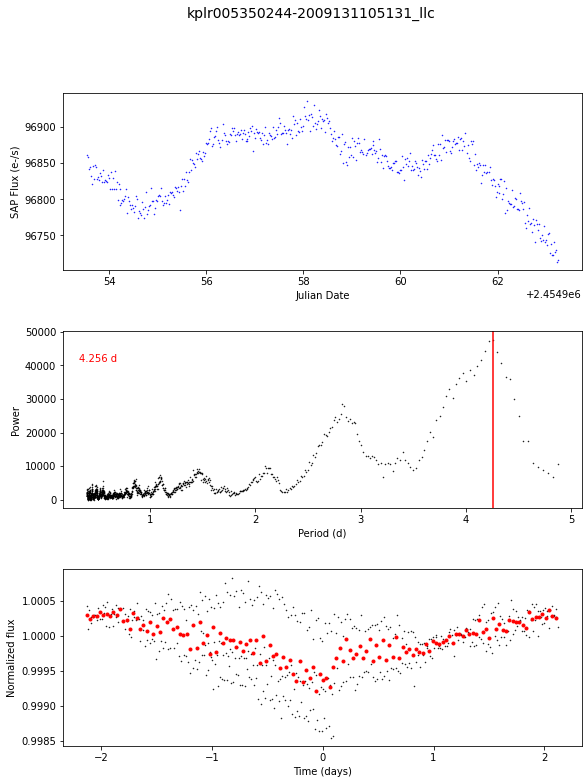

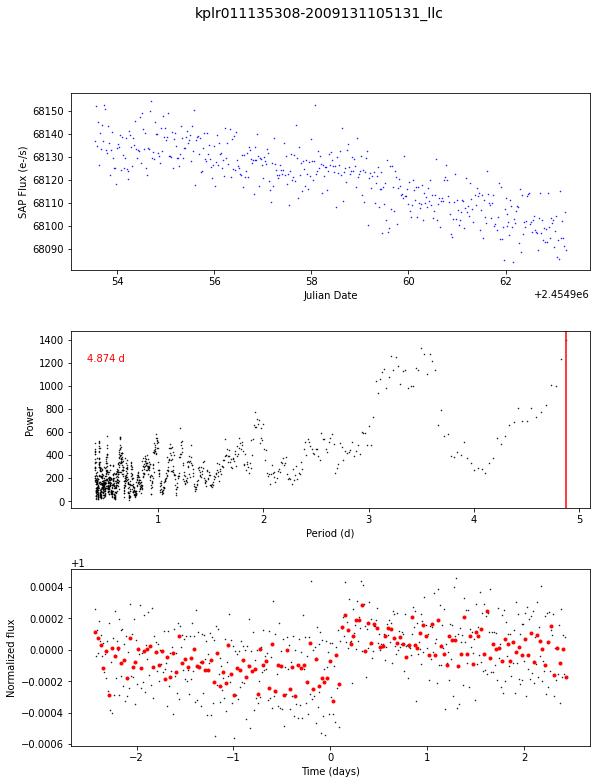

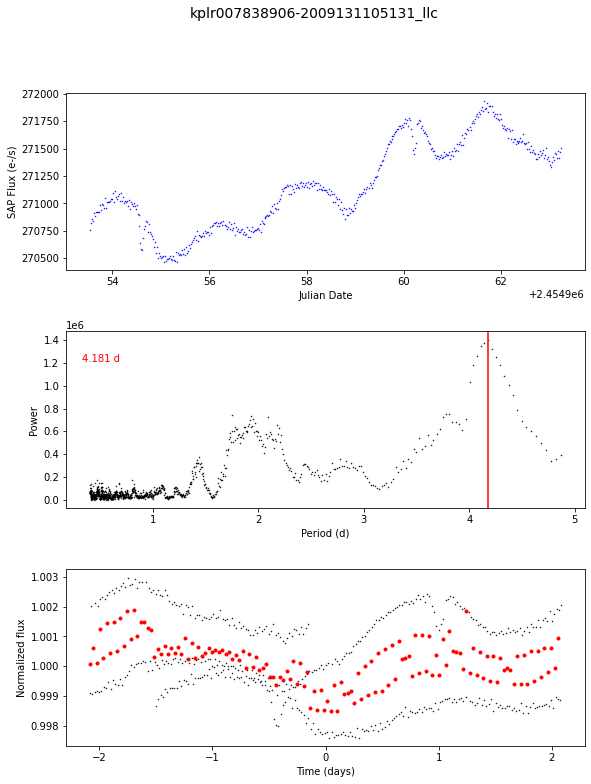

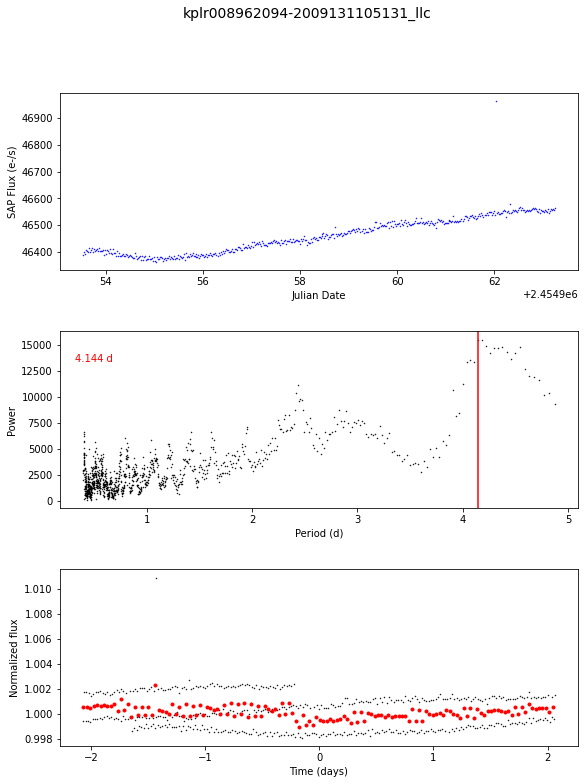

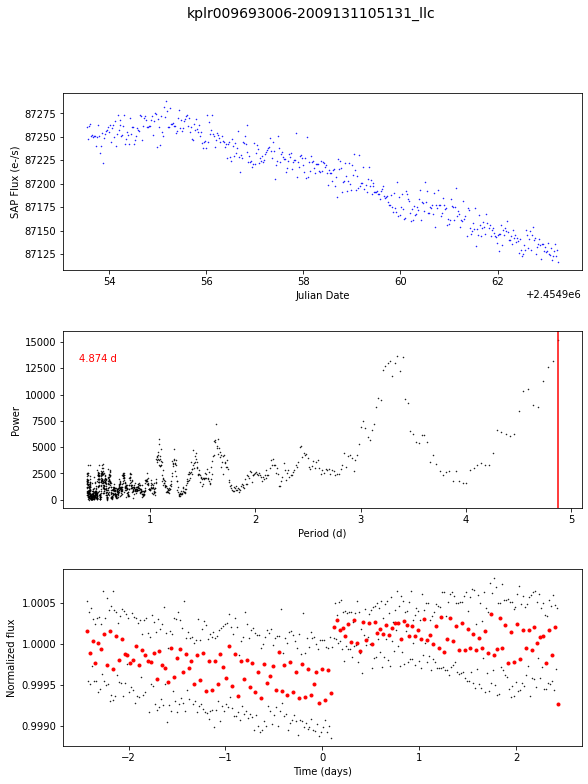

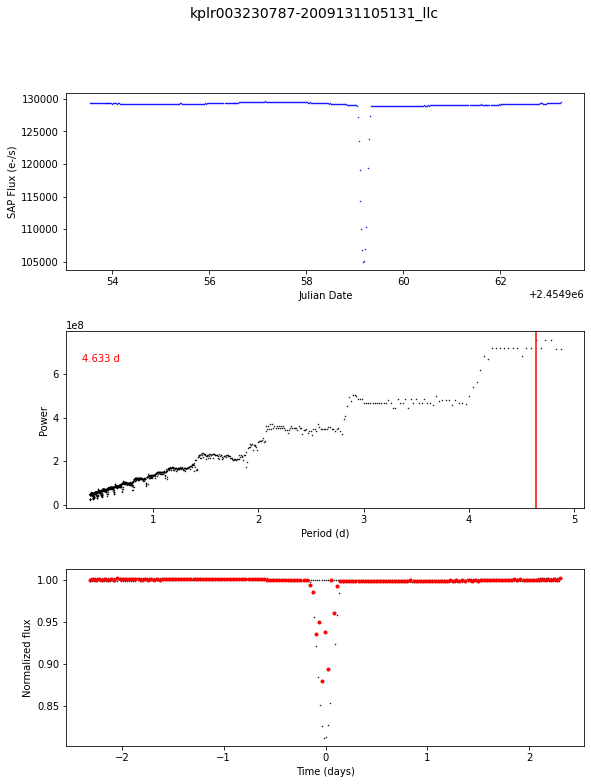

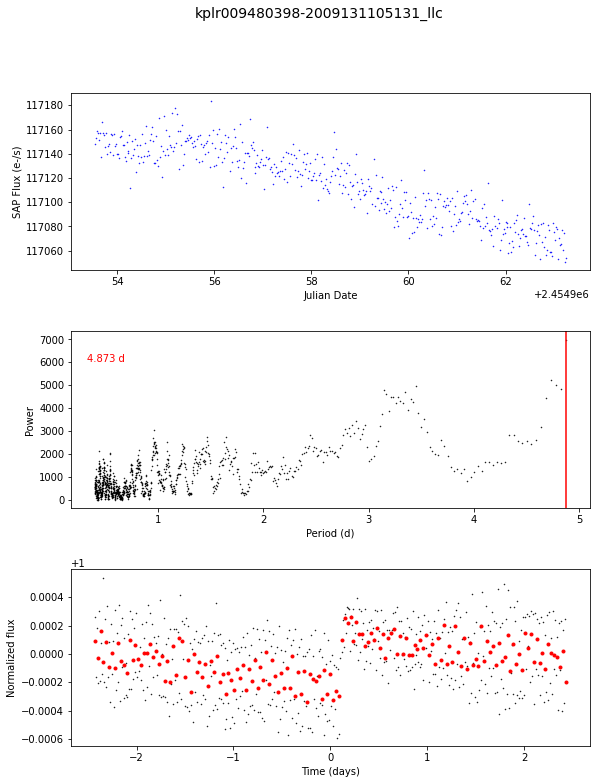

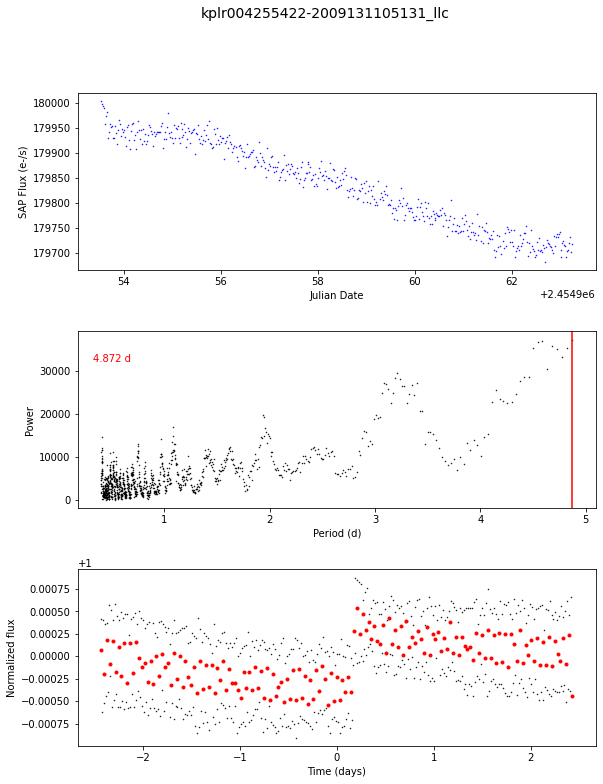

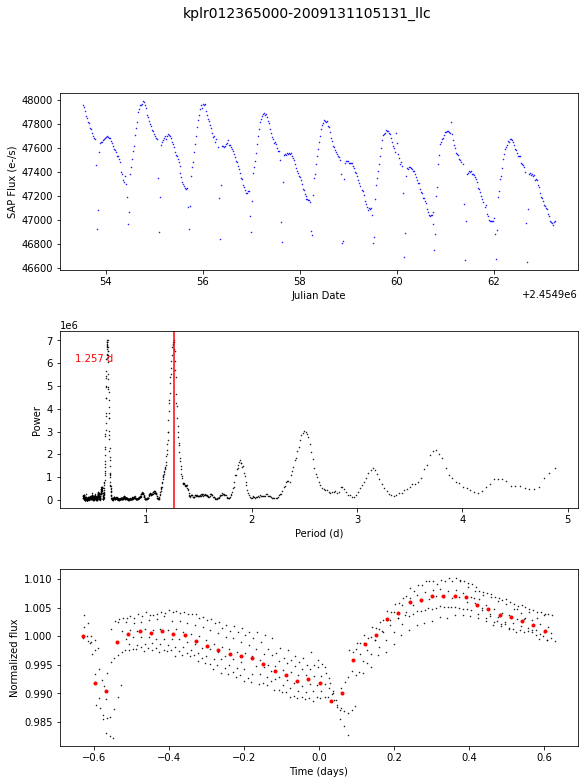

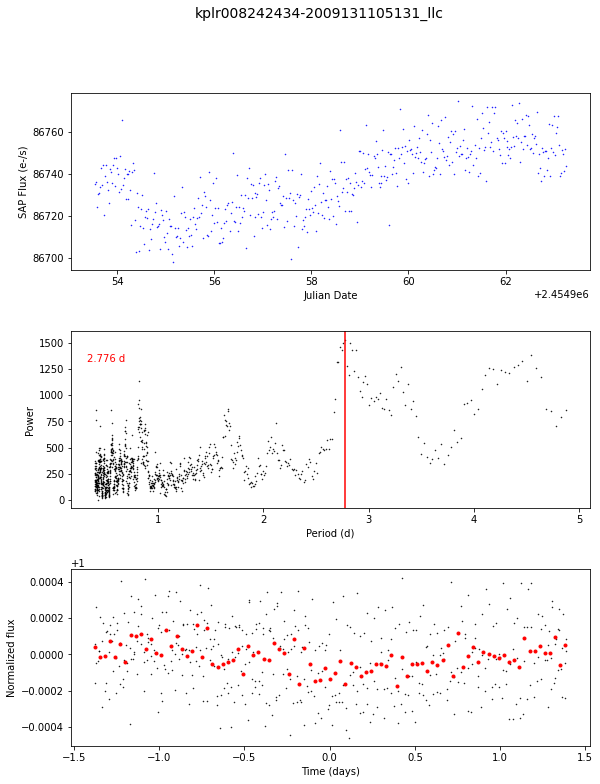

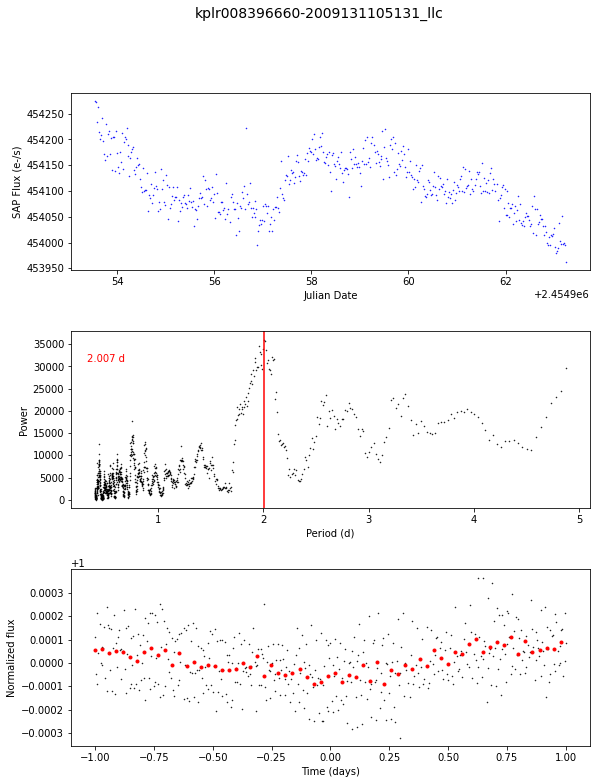

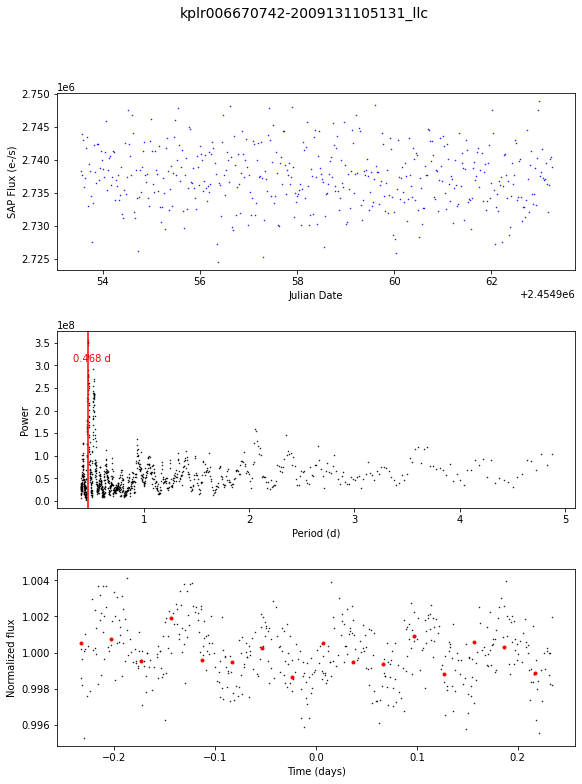

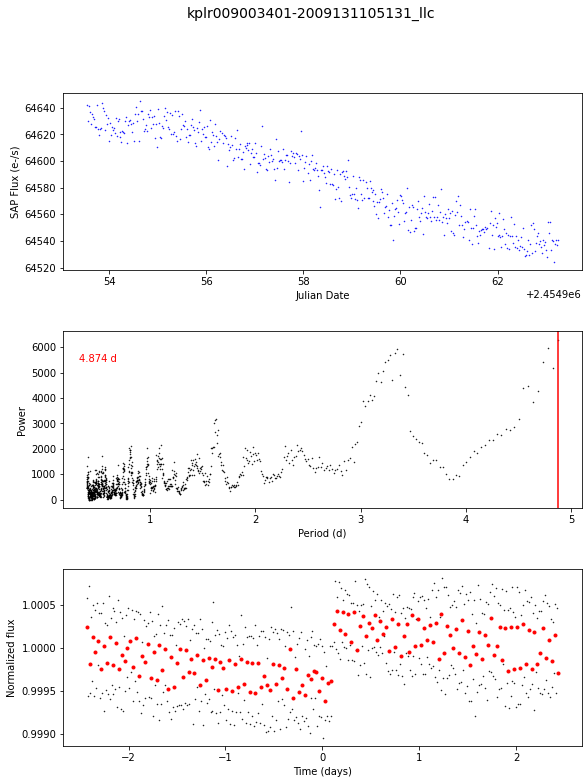

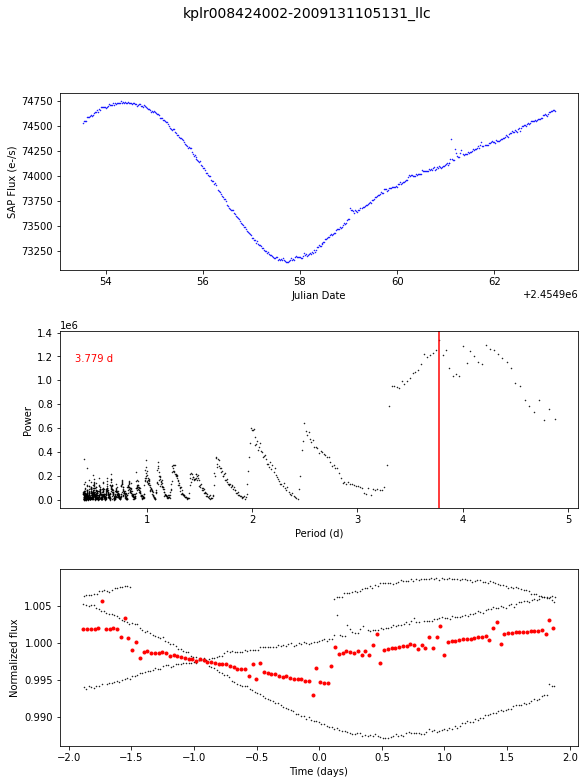

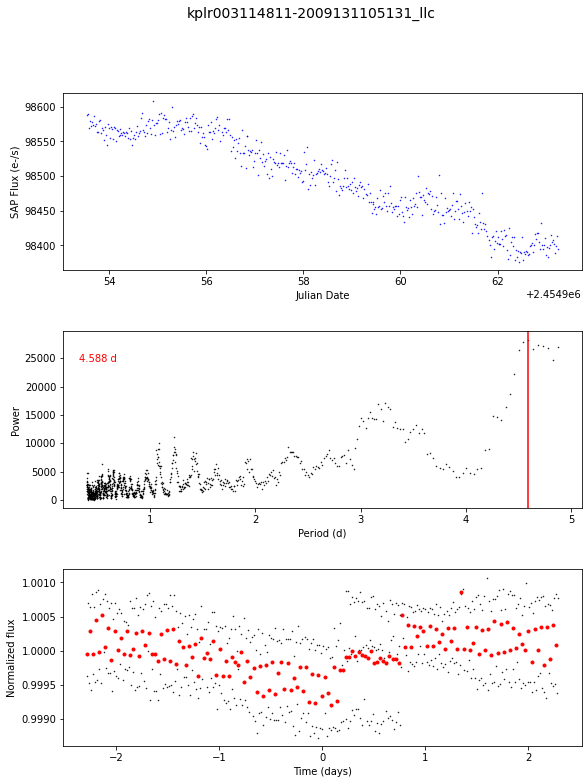

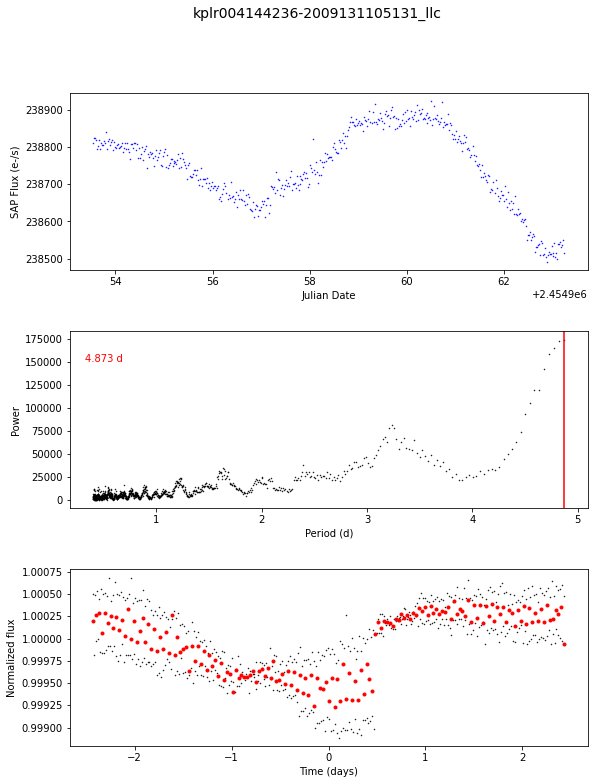

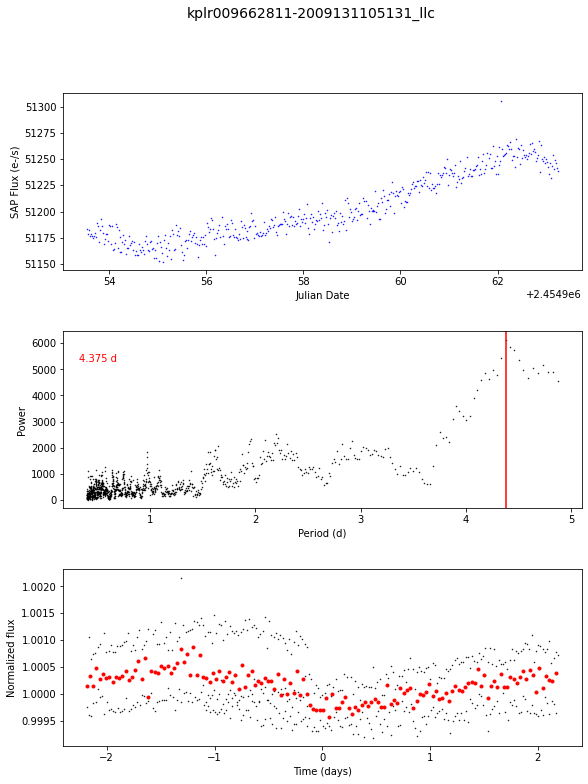

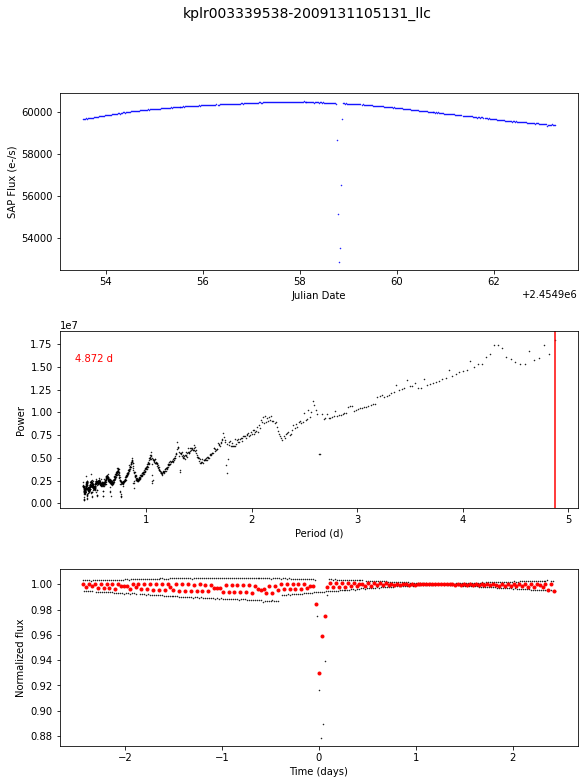

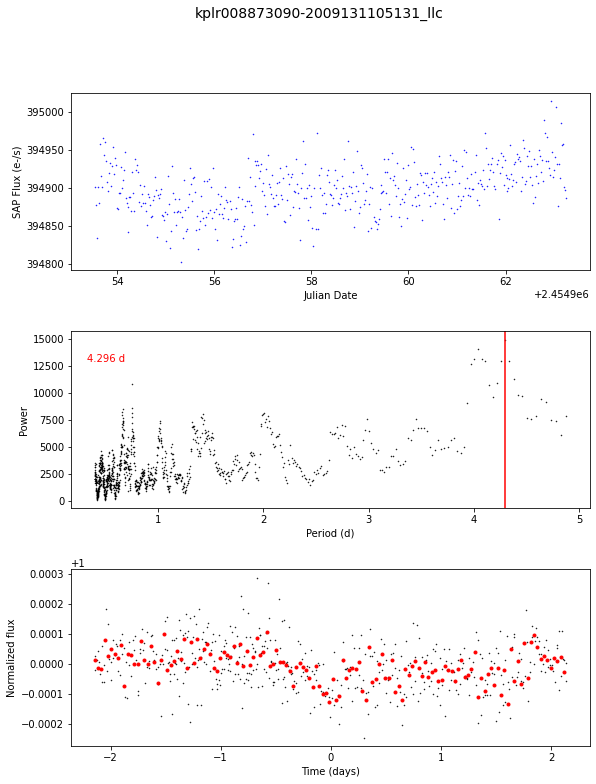

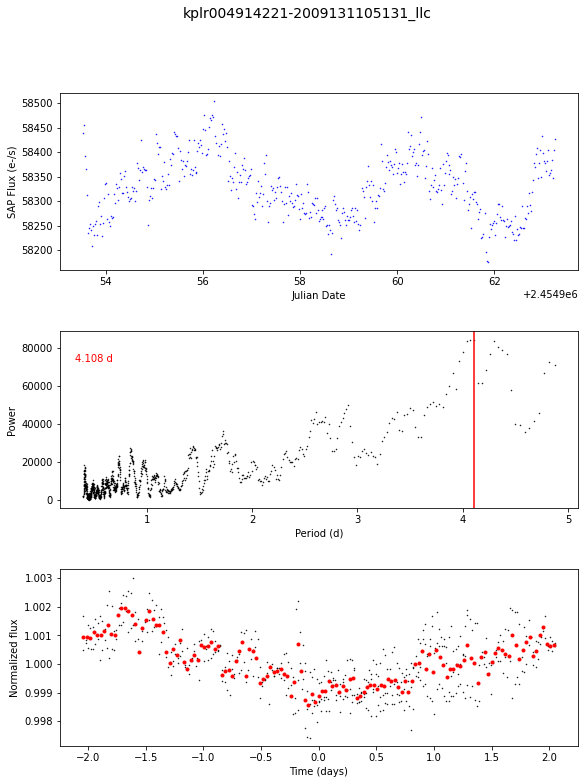

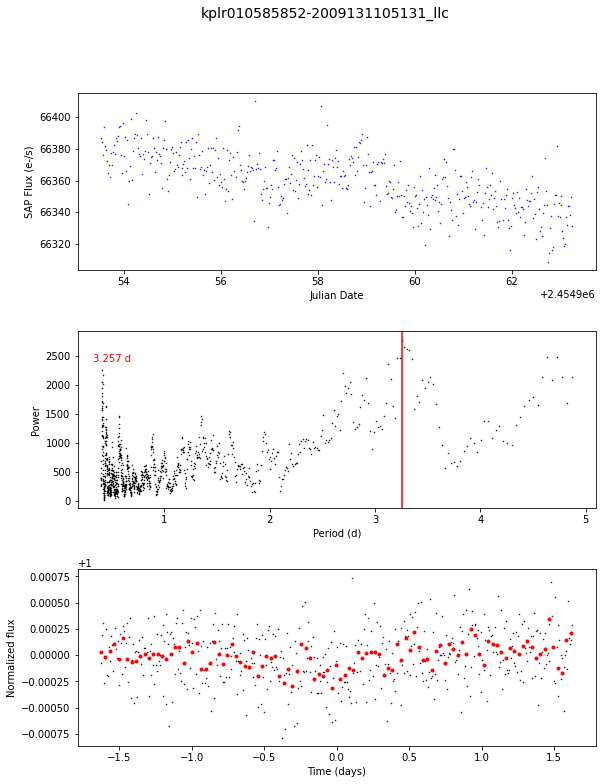

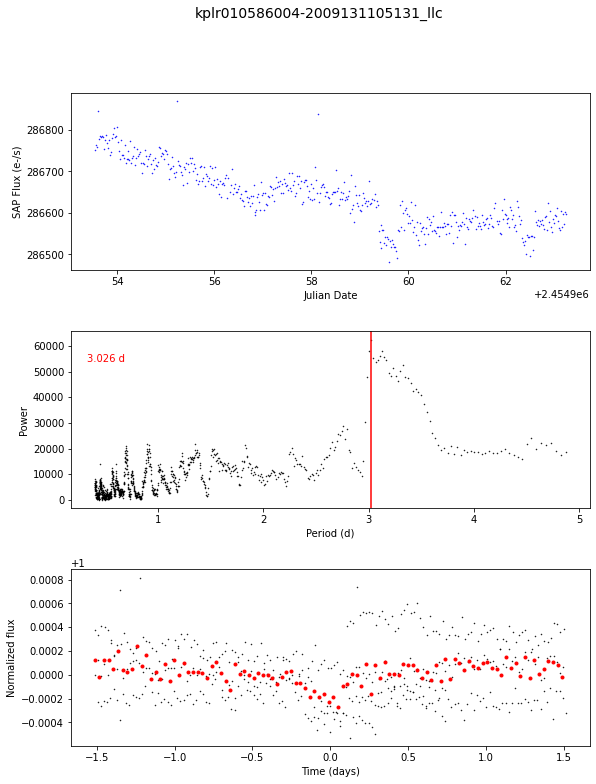

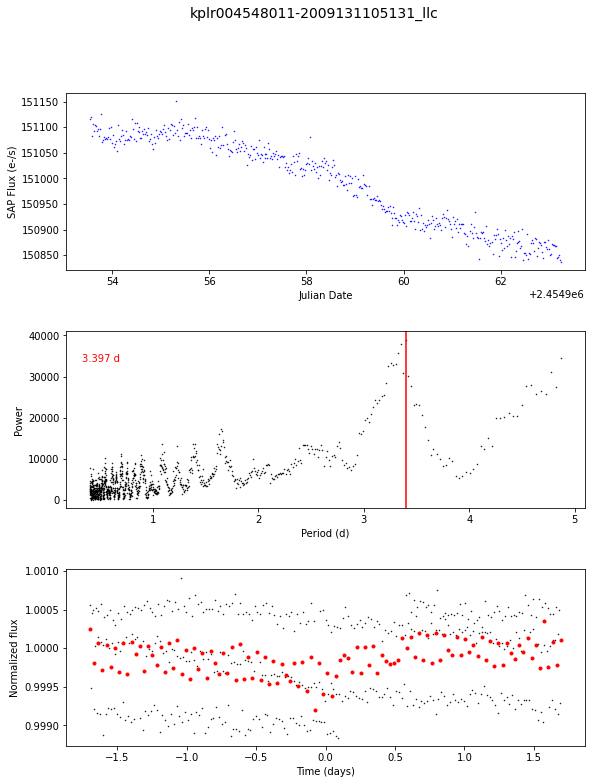

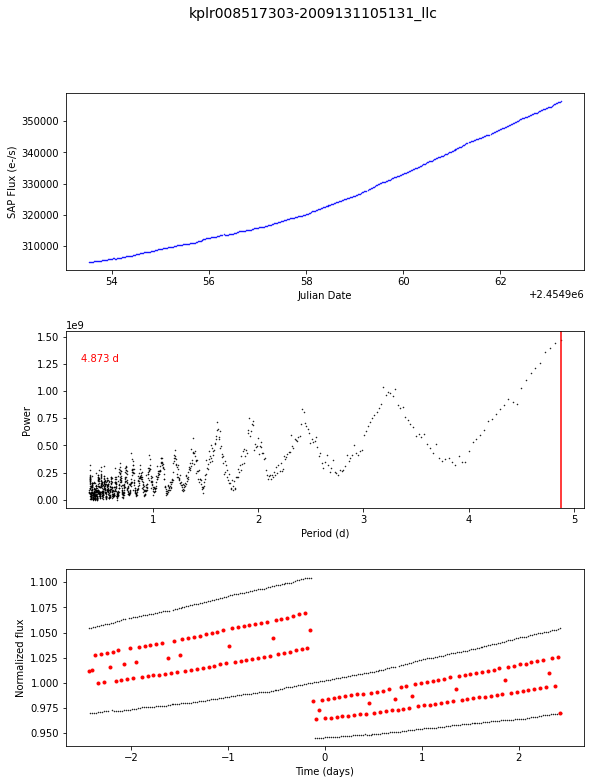

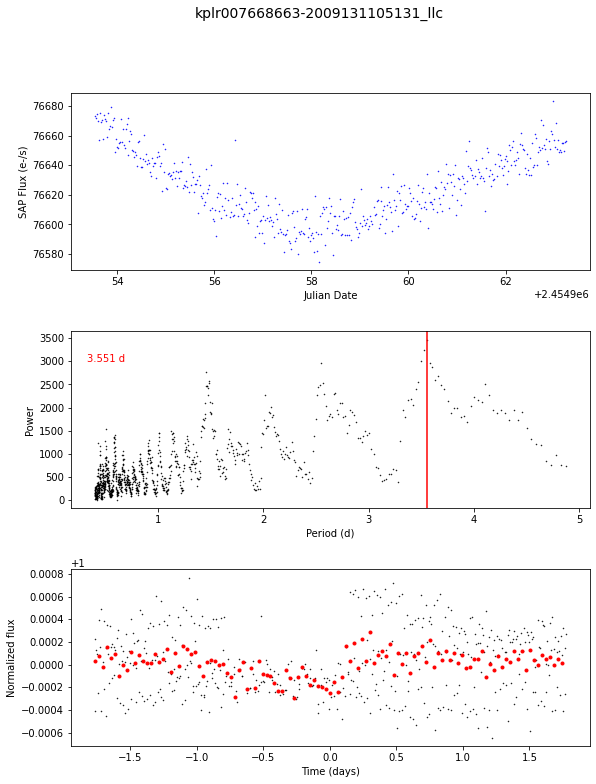

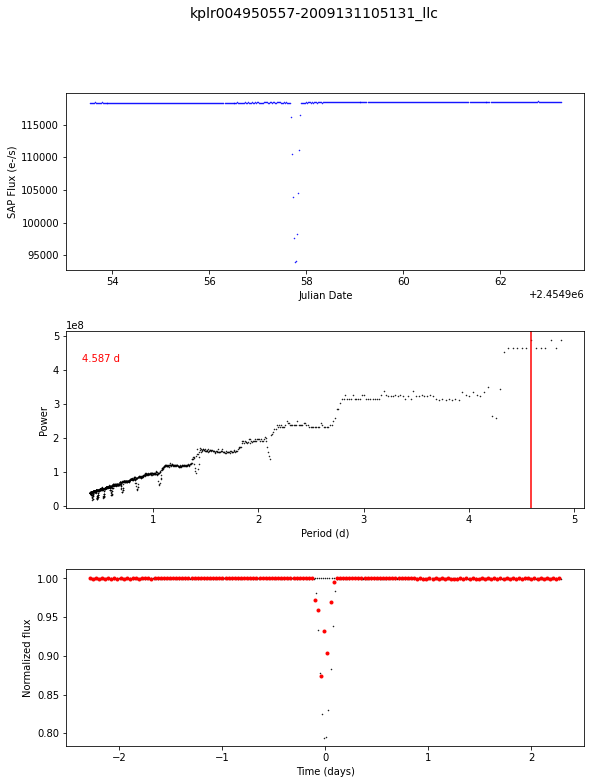

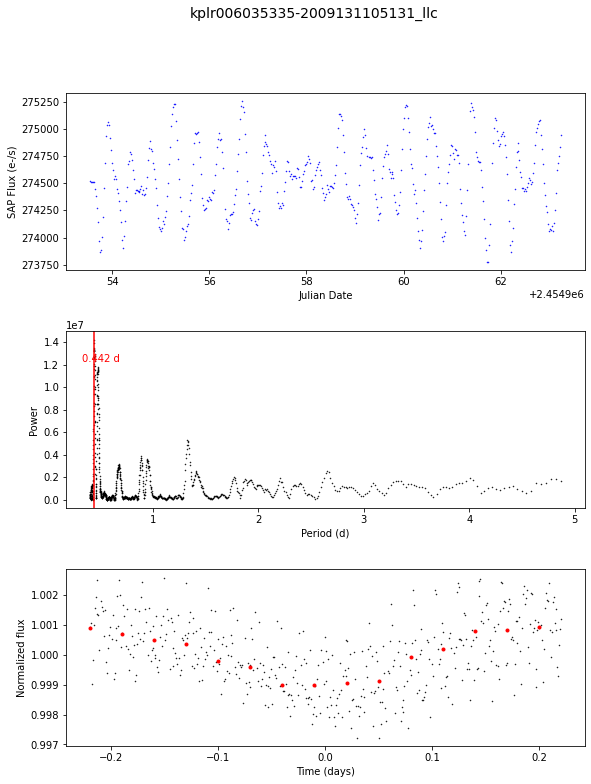

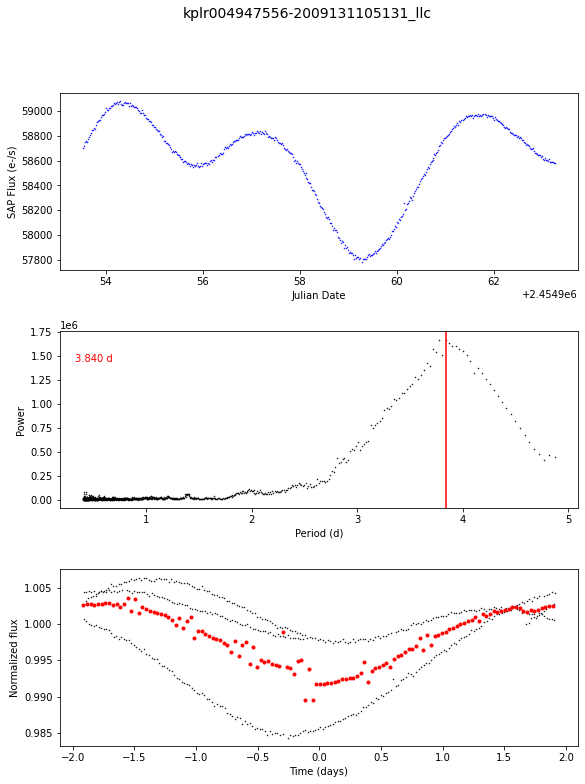

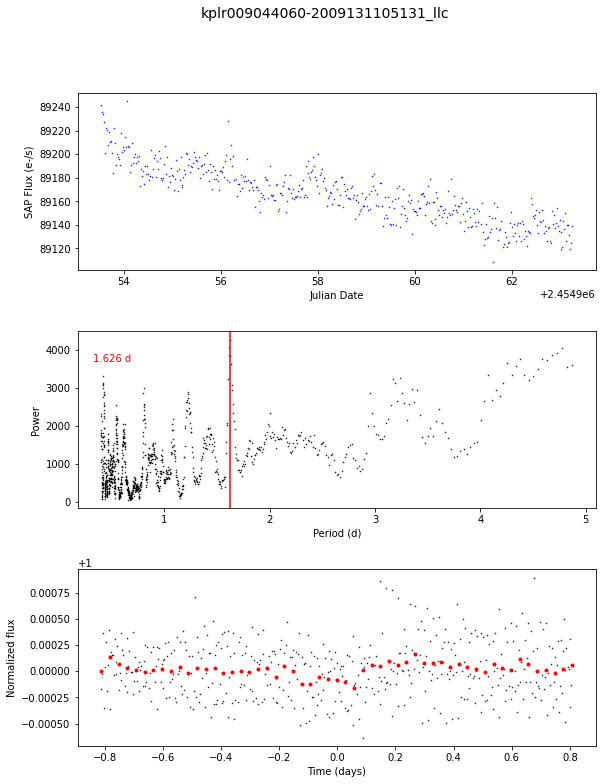

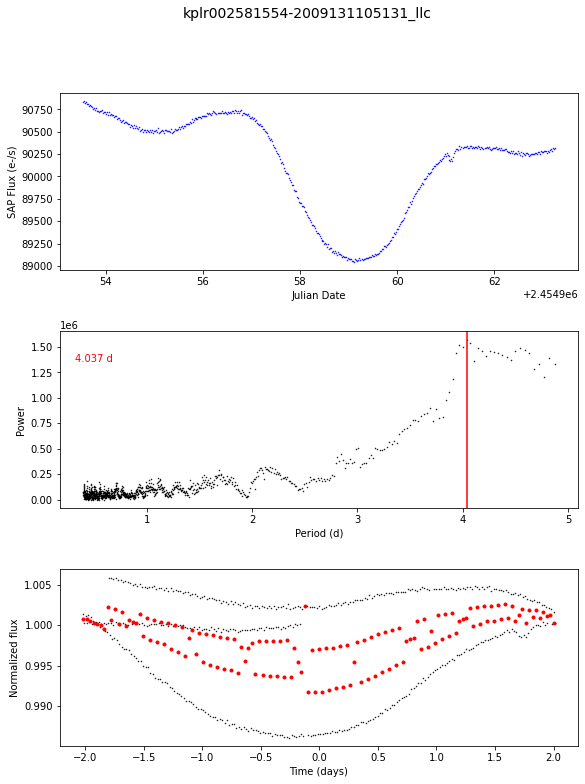

In [7]:
curves=0
out = np.zeros((len(sample), 1))
i = 0
tempo = 1
for path, subdirs, files in os.walk(root):
    for name in sample:
        curves=curves+1
        file = [os.path.join(path, name)]
        str = " " 
        Ffile = (str.join(file))
        route = Path(name)
        Fname = route.with_suffix('')
        Fpng = route.with_suffix('.png')

        filename = Ffile
        ts = TimeSeries.read(filename, format='kepler.fits')  
        fig, ax = plt.subplots(3, 1, figsize=(8, 12))
        fig.suptitle(Fname, size=14)
        fig.subplots_adjust(hspace=0.35, wspace=0.15, left=0.07, right=0.97)
        
        ax[0].plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1, color='blue')
        ax[0].set_xlabel('Julian Date')
        ax[0].set_ylabel('SAP Flux (e-/s)')
          
        periodogram = BoxLeastSquares.from_timeseries(ts, 'sap_flux') 
        
        results = periodogram.autopower(0.2 * u.day)  
        best = np.argmax(results.power)  
        period = results.period[best]
        
        client2 = udp_client.SimpleUDPClient("127.0.0.1", 9998)
        client4 = udp_client.SimpleUDPClient("127.0.0.1", 9996) 
        client6 = udp_client.SimpleUDPClient("127.0.0.1", 9994) 
        
        ax[1].plot(results.period, results.power, 'k.', markersize=1)
        ax[1].set_xlabel('Period (d)')
        ax[1].set_ylabel('Power')
        ax[1].axvline(period.value, color='r');
        ax[1].text(0.03,0.83,'{:.3f}'.format(period), transform=ax[1].transAxes, color='r')
       
        transit_time = results.transit_time[best]  
        ts_folded = ts.fold(period=period, epoch_time=transit_time)  
              
        mean, median, stddev = sigma_clipped_stats(ts_folded['sap_flux'])  
        ts_folded['sap_flux_norm'] = ts_folded['sap_flux'] / median  
        
        ts_binned = aggregate_downsample(ts_folded, time_bin_size=0.03 * u.day) 
        
        ax[2].plot(ts_folded.time.jd, ts_folded['sap_flux_norm'], 'k.', markersize=1)
        ax[2].plot(ts_binned.time_bin_start.jd, ts_binned['sap_flux_norm'], 'r.', drawstyle='steps-post')
        ax[2].set_xlabel('Time (days)')
        ax[2].set_ylabel('Normalized flux')
        plt.savefig('Spectra.png')
        client4.send_message("/s", tempo)
        client6.send_message("/p", 1)
        out[i] = period.value * 100
        client2.send_message("/y", out[i])
        i += 1
        time.sleep(tempo)
        client4.send_message("/s", 0)
    client6.send_message("/p", 0)

        
print ("KOI represented:",curves, "curves")    

In [8]:
out

array([[472.6987252 ],
       [487.22578052],
       [204.21693403],
       [318.97890681],
       [204.2244436 ],
       [418.150343  ],
       [487.32871408],
       [ 50.23842795],
       [472.70341588],
       [325.63491345],
       [487.43268741],
       [171.50441351],
       [337.27302664],
       [293.21702247],
       [487.20913546],
       [487.3624757 ],
       [339.75985394],
       [487.434131  ],
       [363.28007985],
       [347.17270656],
       [170.88121208],
       [327.84444126],
       [482.4087022 ],
       [111.98273918],
       [487.38763969],
       [487.34603267],
       [ 68.20433478],
       [334.8657823 ],
       [472.7043727 ],
       [477.38957925],
       [421.86436033],
       [314.75571377],
       [384.03165213],
       [437.52383828],
       [487.34496152],
       [487.28657622],
       [ 81.82959258],
       [477.52290697],
       [487.23772124],
       [334.92527823],
       [487.32022395],
       [421.81420129],
       [390.35667547],
       [ 45

In [11]:
import session_info
session_info.show()